# 5054 Assignment 2
-YU Feihong

# Problem 1: Basics Knowledge

### 1. Prove how linear regression solve the cubic spline regression
Prove explicitly that how fitting a cubic spline regression can be solved by linear regression with equality
constraints. Suppose the given data are (x1, y1), · · · ,(xn, yn) and the knots are (ξ1, · · · , ξK).

Cubic spline regression involves fitting a piecewise cubic polynomial, defined by its continuity and differentiability at the "knot" points. To fit a cubic spline to a given set of data, Construct a new set of variables:

- The original variable x,
- The square of x (i.e., x²),
- The cube of x (i.e., x³),
- And for each knot ξk, the variable (x - ξk)³⁺, where (x - ξk)³⁺ = (x - ξk)³ if x > ξk and 0 otherwise.

Let's denote these new variables as z₁, z₂, z₃, ..., z₄+K. Our cubic spline model can then be written as:

y = β₁z₁ + β₂z₂ + β₃z₃ + ... + β₄+Kz₄+K + ε

This is a linear regression model on the new variables z. The coefficients of this model β₁, β₂, β₃, ..., β₄+K can be estimated using least squares.  
To ensure the continuity and differentiability of the piecewise cubic at the knots, introduce some equality constraints. Specifically:

- For continuity, the fitted values from the two cubic polynomials on either side of ξk must be equal at ξk.
- For differentiability, the first and second derivatives of the two cubics at ξk must also be equal.

These constraints can be built into the linear regression problem by adding them as constraints in the least squares optimization.
Fitting a cubic spline regression can be reframed as a linear regression problem with equality constraints, where the constraints ensure the continuity and differentiability of the piecewise cubic polynomials at the knots.

 ### 2. Natural cubic spline
 Derive the basis functions of natural cubic spline from the truncated power basis functions 1, x, x2, x3,(x −ξ1)^3+   +(x − ξK)^3 of cubic spline.

A natural cubic spline is a piecewise cubic polynomial that has continuous first and second derivatives at the K knots ξ1, ξ2, ..., ξK, and which is linear beyond the boundary knots (i.e., to the left of ξ1 and to the right of ξK).

The truncated power basis functions are 1, x, x², x³, (x - ξ1)³⁺, ..., (x - ξK)³⁺, where (x - ξk)³⁺ is a truncated power function defined as:

(x - ξk)³⁺ = (x - ξk)³ if x > ξk and 0 otherwise

The first two basis functions of a natural cubic spline:

- h₀(x) = 1
- h₁(x) = x

The remaining K+1 basis functions can be derived from differences between the truncated power functions:

- h₂(x) = x² - (x - ξ1)²⁺
- h₃(x) = x³ - (x - ξ1)³⁺ - (x - ξ2)³⁺
- ...
- hₖ+1(x) = (x - ξₖ)³⁺ - (x - ξₖ₊₁)³⁺ for k = 2,...,K-1
- hK+2(x) = (x - ξK)³⁺

In total, we have K+3 basis functions for a natural cubic spline with K knots. Each function hₖ(x) is a cubic polynomial within the interval [ξₖ₋₁, ξₖ] and linear for x > ξₖ. Additionally, hₖ(x) = 0 for x < ξₖ₋₁, which ensures that each hₖ(x) only contributes to the spline function within the interval [ξₖ₋₁, ξₖ].

Finally, a natural cubic spline S(x) can be expressed as a linear combination of these basis functions:

S(x) = ∑ₖ βₖhₖ(x)

where the coefficients βₖ can be estimated using least squares.

### 3.Smoothing splines

Smoothing splines are used to estimate a smooth function that approximates a set of observed data points. The aim is to find a function that fits the data well, but is also smooth to avoid overfitting.

The cubic smoothing spline for a given value of the smoothing parameter λ is the function f that minimizes:  
$∑(y_i - f(x_i))^2 + λ∫f''(t)^2 dt$  
the first term measures the fit of f to the data and the second term penalizes the lack of smoothness in f. The smoothing parameter λ controls the trade-off between these two terms.
In the context of smoothing splines, the effective degrees of freedom (df_λ) is defined as the trace of the smoothing matrix S_λ, which can be denoted as:  
$ŷ = S_λy$  
$df_λ = trace(S_λ)$  
The smoothing matrix $S_λ$ is a n x n matrix where n is the number of observations, its (i, j)th element is the derivative of the predicted value for the ith observation with respect to the jth observed response value.  
$S_λ(i, j) = ∂\hat{y}_i / ∂y_j$  
the effective degrees of freedom for the smoothing spline is the sum of the diagonal elements of $S_λ$:  
$df_λ = ∑ ∂\hat{y}_i / ∂y_i = ∑ S_λ(i, i)$  
This is equivalent to the trace of the smoothing matrix S_λ, since the trace of a matrix is the sum of its diagonal elements.The effective degrees of freedom in smoothing splines is equal to the sum of the influence that each observed response value has on its corresponding predicted value.



### 4. Piecewise polynomial regression and local polynomial regression
**Piecewise polynomial regression**  
Divide the range of the independent variable into intervals, or "slices," and then fit a polynomial to the data within each interval, using a separate polynomial function for each interval.  
The polynomial function is selected to ensure smoothness at each node. The order of the polynomial determines the smoothness of the fitted curve.  
A common choice is a cubic polynomial, which produces a piecewise cubic spline. The advantage of this approach is the flexibility to model complex patterns, but the location of nodes needs to be chosen carefully.

**Local polynomial regression**  
Local polynomial regression is a non-parametric regression method that aims to estimate the value of a point by using a small subset (or "part") of the data.  
A weighting function is used to determine which data points should be considered "local", giving greater weight to observations that are closer to the predicted point. This weighting function usually depends on the bandwidth parameter h. The choice of bandwidth h is very important, as it determines the smoothness of the model. A larger h means that each local fit contains more data points, which results in a smoother (and possibly more biased) model. Conversely, a smallerh means that each local fit contains fewer data points, which results in a more flexible (but potentially higher variance) model.  
A major advantage of local polynomial regression is that it can accommodate complex, nonlinear patterns in the data without requiring us to know the exact form of those patterns in advance.

### 5. Why does local polynomial regression has bad interpretability? 
1. **Locality**: Local polynomial regression creates a separate model for each point in the data based on a local subset of the data. This means that the behavior of a model can change dramatically from one point to another, making it difficult to summarize the relationships between variables with simple equations or rules.

2. **Non-parametric properties**: Unlike parametric models such as linear regression, which use a fixed number of parameters to express the relationship between variables, local polynomial regression does not assume a specific functional form. This means that there are no simple equations that describe the model at all points, making interpretation difficult

3. **Weighting mechanism**: In local polynomial regression, there will be a weighting mechanism. The weighting mechanism is usually a function involving bandwidth parameters, which is another aspect of the model that is difficult to explain intuitively.

4. **Dimensionality**: Local polynomial regression can become more difficult to interpret when dealing with multiple predictors. In higher dimensions, the concept of "local" may become less clear, and the model may be more difficult to visualize and understand.

### 6. Does increasing the bandwidth h in polynomial regression will increase or decrease the bias? How about the variance?
Increasing the bandwidth (h) in local polynomial regression generally results in increased bias and decreased variance.

**Bias**: Large bandwidth (h) means that the local regression of each point is affected by a large number of surrounding points. This may result in a smoother curve, but may not capture all complex changes in the data, thereby increasing the bias of the model.

**Variance**: On the other hand, variance refers to the amount that the model will change if we estimate the model using a different data set than the population. Smaller bandwidth means that the local regression of each point is affected by fewer surrounding points. This can result in a more complex curve that closely follows the data, and while it may capture complex changes, it may also capture noise. This can cause the model to vary greatly with small changes in the data, resulting in a high variance model.

Increasing the bandwidth (h) in local polynomial regression generally results in increased bias and decreased variance. Conversely, decreasing h generally results in decreased bias and increased variance.

### 7. Regression trees
Regression trees are most similar to which of the following methods:
(a)K nearest neighbor regression
(b) Piecewise constant regression
(c) Logistic regression

Most similar to **(b) piecewise constant regression**.
Neither approach makes assumptions about the functional form of the relationship between predictors and response.  

**The main difference between these two methods is how they create these partitions.**
 Piecewise constant regression typically uses predetermined bounds (such as quantiles), and regression trees create these bounds from the data to minimize the residual sum of squares. Therefore, regression trees can often capture more complex patterns in the data.

Both methods divide the feature space into different regions and then fit a simple model (a constant for piecewise constant regression, and the average response of the regression tree) within each region.

In piecewise constant regression, the feature space is partitioned into disjoint parts and a constant value (usually the mean or median of the dependent variable) is predicted for all observations within a given part. The boundaries of these parts are usually determined by the data themselves, for example by using the quantiles of the independent variables.

**Regression trees** also divide the feature space into distinct and non-overlapping regions, but the process of forming these regions is more complex. It involves a recursive binary splitting process that seeks to select at each step the split that results in the largest possible reduction in the sum of squared residuals. The prediction for observations within a given region is simply the average response of the training observations within that region.



### 8. hen a tree gets finer, how does the bias and variance behave?
As a tree-based model gets finer, meaning it has more splits and thus more depth, the behavior of bias and variance changes in the following way:

**Bias**: When a tree gets finer, it is more flexible and can fit the training data more closely. This results in a decrease in bias because the model can capture more complex patterns and is less likely to underfit the data.

**Variance**: However, as a tree gets finer, it becomes more sensitive to the specific details and noise in the training data. This means it is more likely to overfit the data, capturing noise along with the underlying patterns. Overfit models perform well on their training data but poorly on new, unseen data. Therefore, as a tree gets finer, the variance of the model increases.

This is another manifestation of the bias-variance tradeoff:

- A model with high bias makes strong assumptions about the data and tends to underfit it, failing to capture all of the relevant patterns. 
- A model with high variance does not make strong assumptions about the data and tends to overfit it, capturing noise along with the relevant patterns.

When constructing a tree-based model, it's important to balance these two sources of error. Techniques like pruning (removing unnecessary branches from the tree), setting a maximum depth for the tree, or using ensemble methods like random forests or gradient boosting can help achieve a good balance.

### 9. Which methods can have the smallest bias?
(a) Linear regression
(b) Regression tree
(c) Natural splines

Much depends on the true relationship between the predictors and the response.
1) If the relationship is indeed linear, then linear regression is likely to have minimal bias.
2) If the relationship is nonlinear, regression trees or natural splines may have smaller biases.


**a Linear Regression**: This method assumes a linear relationship between the dependent and independent variables. If this assumption holds, then the bias of a linear regression model can be very low. However, if the true relationship is nonlinear, linear regression can be highly biased because it fails to capture the underlying pattern in the data.

**b Regression tree**: Regression trees do not make parametric assumptions about the relationship between the dependent variable and the independent variable. They divide the feature space into different regions and make predictions for each region. This enables them to capture non-linear relationships. However, if the true relationship is very complex, a simple regression tree may still exhibit some bias.

**c Natural splines**: Compared with linear regression, natural splines can fit more flexible curves and can model quite complex nonlinear relationships. They do this by fitting different polynomial functions to different parts of the data. If the true relationship is nonlinear, natural splines may have lower bias than linear regression or regression trees

### 10. Random Forest
Write down the formal and explicit definition of variable importance measure for random forest using math
notations. How can we do variable section/model selection in random forest?
In a random forest, the importance of a variable is typically measured by averaging the improvement in accuracy that the variable's splits contribute across all trees. Each tree's contribution is estimated by the improvement in the Out-of-Bag (OOB) samples. The main advantage of this method is that it is unbiased and can be computed directly during the training of the model, without the need for a separate validation set or cross-validation.

Specifically, for each feature in a random forest model, its importance measure can be formalized as follows:

$$VI(X_j) = \frac{1}{ntrees} \sum_{t=1}^{ntrees} \Delta err(t, X_j)$$


- $VI(X_j)$ is the importance measure of feature $X_j$.
- $ntrees$ is the number of trees in the random forest.
- $\Delta err(t, X_j)$ is the improvement in the error rate due to the split on feature $X_j$ in the $t$-th tree.

Variable selection or model selection in random forests is commonly performed using the variable importance measure. First, a random forest is trained based on all features, and then the importance of each feature is computed. Features whose importance is below a certain threshold can be discarded, and the model can be retrained with the remaining features. This process can be iteratively performed until a stop criterion is met, such as when the performance on a validation set starts to decrease.


# Problem2  Investigation of the Diameter, Height and Volume for Black Cherry Trees 
- Target: Find the relation between volume and other variables

In [127]:
import pandas as pd 
import numpy as np 
data = pd.read_csv('/Users/Cecilia/Documents/HKUST Data Driven Modeling/机器学习5054/HW2/Assignment 2/trees.csv')

In [128]:
data.rename(columns={'Girth': 'Diameter'}, inplace=True)
data.head()

,Diameter,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8


### 1.Fit polynomial models 
(deg=1,2,3,4) to predict the Volume using Girth. Choose the model with the
largest adjust R-squared. Plot the polynomial function of the model and also plot the confidence bands with ±2 standard error. How about choosing the model using 5-folds?

<div class="alert alert-block alert-warning">
<center><b>【1.Fit polynomial models】</b></center>
1.Best adjusted R-squared: 0.8683138298147475 and the Best polynomial degree: 2   

2.the plot of the polynomial function of the model with bands.
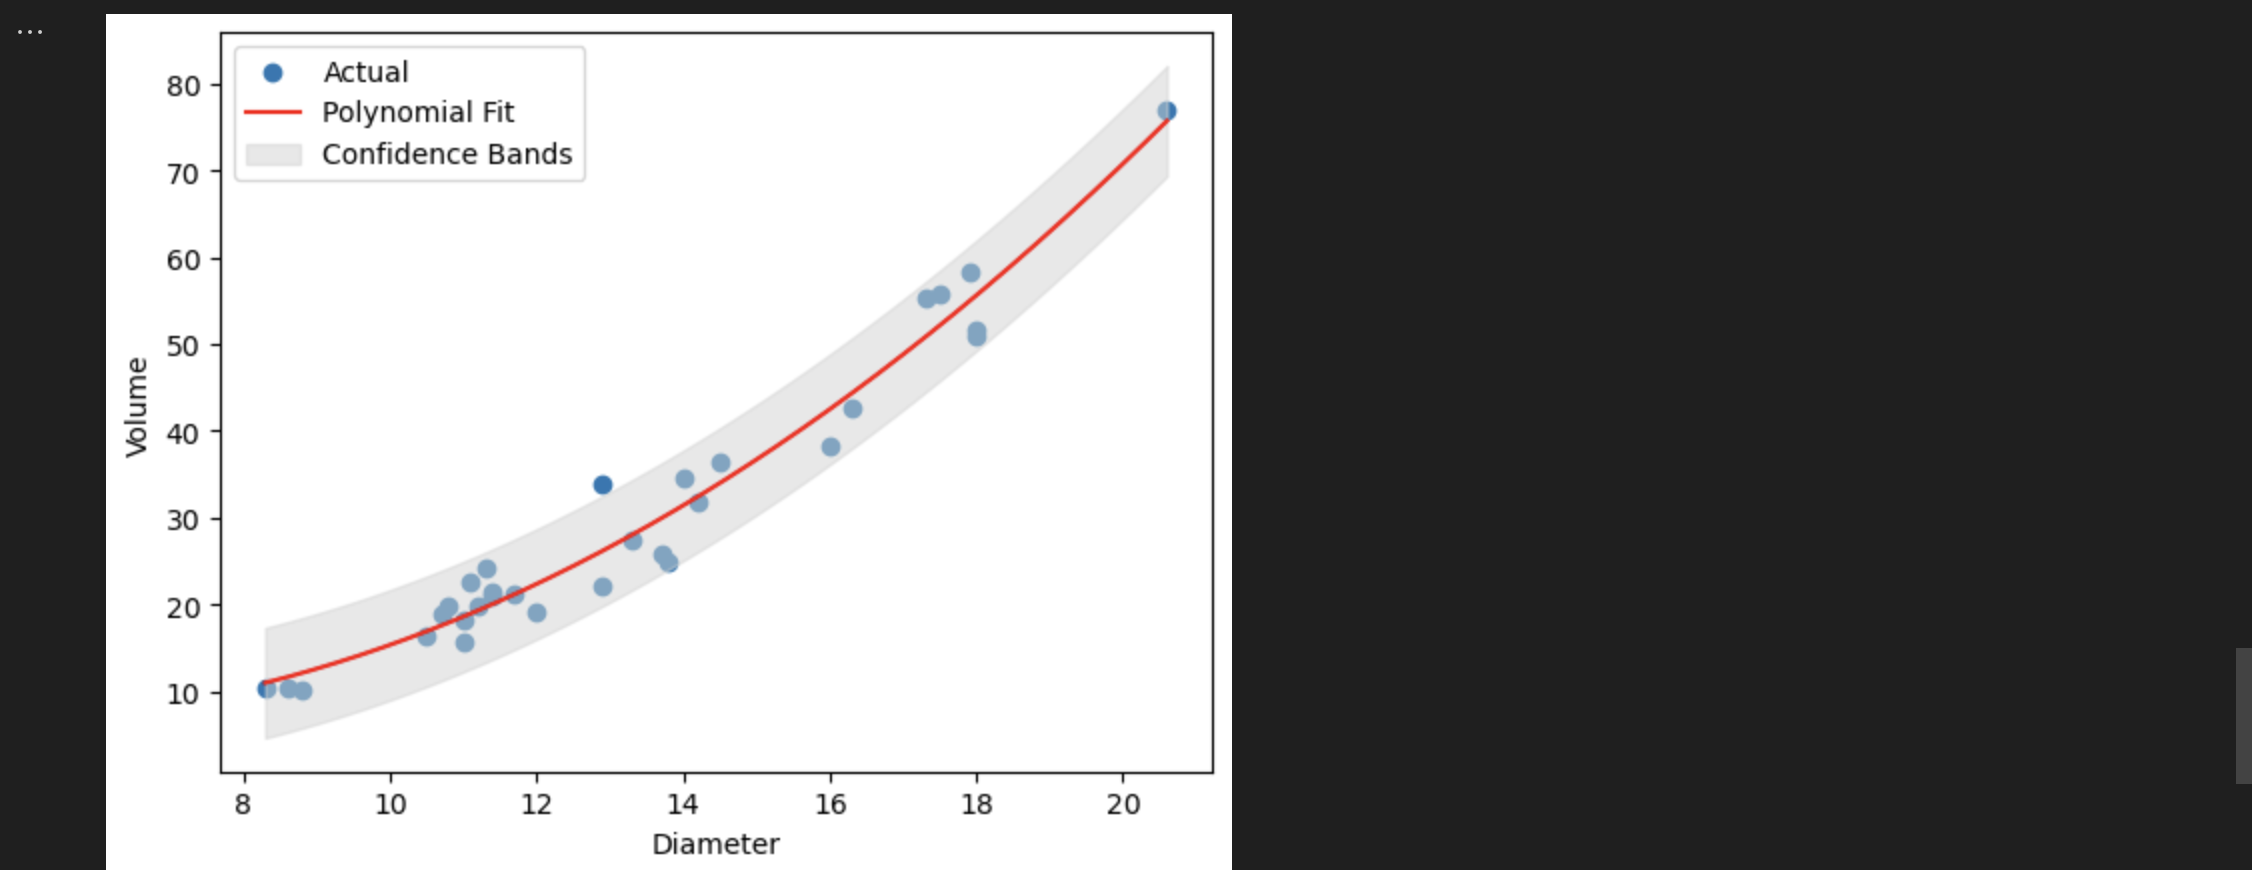

3.Using 5-folds : Best polynomial degree (using 5-CV error): 3 and Lowest 5-CV error: 22.11465817955971
</div>

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

In [130]:
X = data[['Diameter']]
y = data['Volume']

In [131]:
degrees = [1, 2, 3, 4] #deg = [1,2,3,4]
r2_scores = [] #记录r2
adj_r2_scores = [] #记录调和r2

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_poly.shape[1] - 1)
    
    r2_scores.append(r2)
    adj_r2_scores.append(adj_r2)

best_degree = degrees[np.argmax(adj_r2_scores)] 
best_adj_r2 = max(adj_r2_scores)

print(f"Best adjusted R-squared: {best_adj_r2}")
print(f"Best polynomial degree: {best_degree}")


Best adjusted R-squared: 0.8683138298147475
Best polynomial degree: 2


In [132]:
poly_features = PolynomialFeatures(degree=best_degree)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

/Users/Cecilia/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


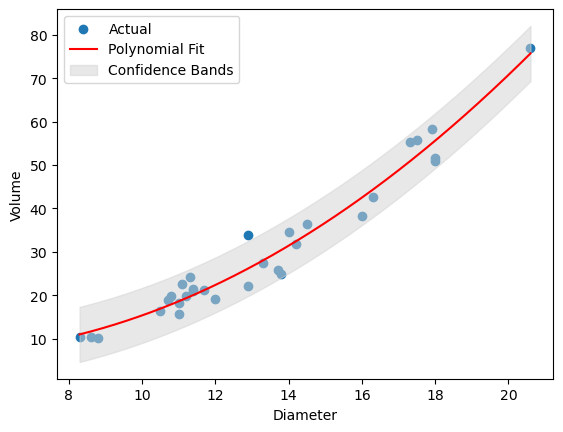

In [133]:
# Generate points along the x-axis for plotting
x_values = np.linspace(min(X['Diameter']), max(X['Diameter']), num=500).reshape(-1, 1)
x_poly_values = poly_features.transform(x_values)

# Predict the y-values using the best model
y_pred = model.predict(x_poly_values)

# Calculate standard error for confidence bands
mse = np.mean((y - model.predict(X_poly)) ** 2)
std_error = np.sqrt(mse)

# Calculate confidence bands
confidence_upper = y_pred + 2 * std_error
confidence_lower = y_pred - 2 * std_error

# Plot the polynomial function and confidence bands
plt.scatter(X['Diameter'], y, label='Actual')
plt.plot(x_values, y_pred, color='red', label='Polynomial Fit')
plt.fill_between(x_values.flatten(), confidence_upper, confidence_lower, color='lightgray', alpha=0.5, label='Confidence Bands')
plt.xlabel('Diameter')
plt.ylabel('Volume')
plt.legend()


plt.savefig('/Users/Cecilia/Documents/HKUST Data Driven Modeling/机器学习5054/HW2/Assignment 2')
plt.show()

In [134]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


cv_errors = []

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    
    model = LinearRegression()
    cv_error = np.mean(-cross_val_score(model, X_poly, y, cv=5, scoring='neg_mean_squared_error'))
    
    cv_errors.append(cv_error)
    
best_cv_degree = degrees[np.argmin(cv_errors)]
best_cv_error = min(cv_errors)

print(f"Best polynomial degree (using 5-CV error): {best_cv_degree}")
print(f"Lowest 5-CV error: {best_cv_error}")

Best polynomial degree (using 5-CV error): 3
Lowest 5-CV error: 22.11465817955971


### Problem 2. Use a polynomial logistic regression model with deg=2 to predict whether the Volume 
is larger or not than 30, using the variable Diameter Plot the function P(Volume > 30) with respect to Diameter and the confidence bands with ±2 standard error.

<div class="alert alert-block alert-warning">
<center><b>【2.Polynomial logistic regressionmodel】</b></center>

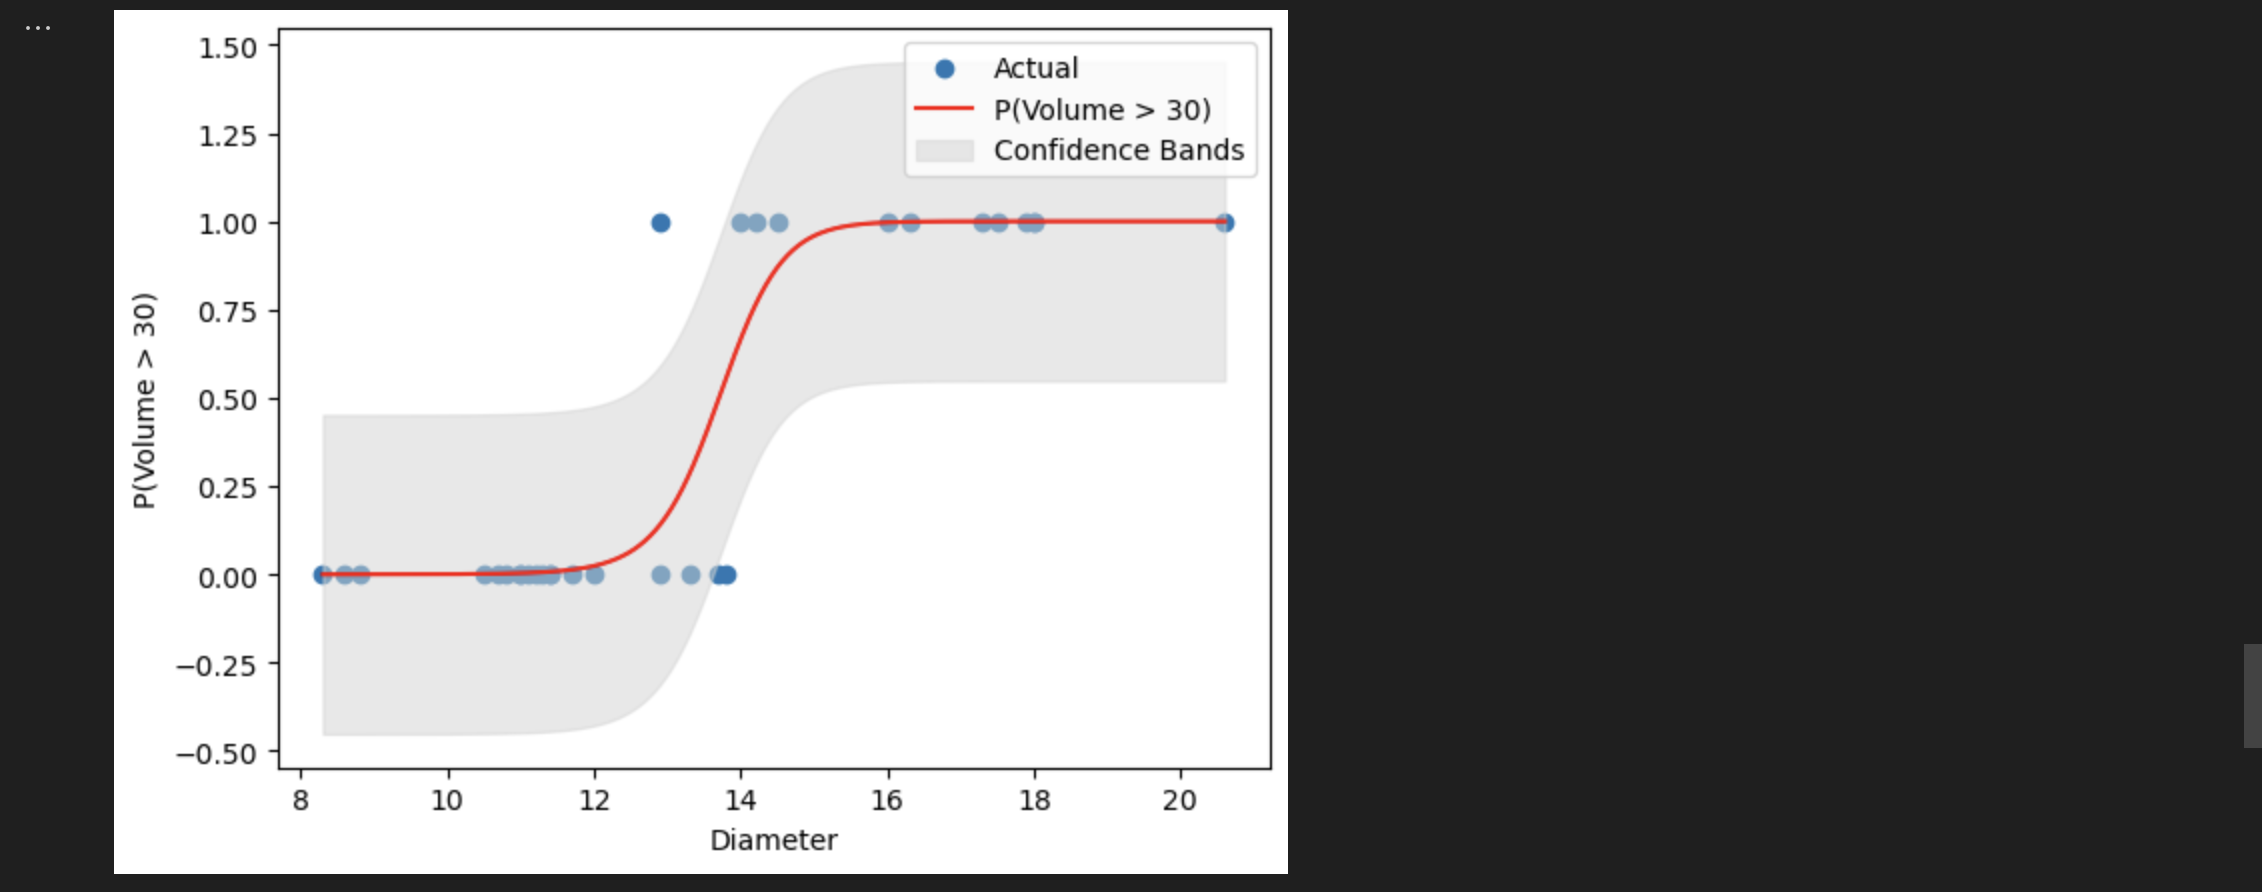

</div>

In [135]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

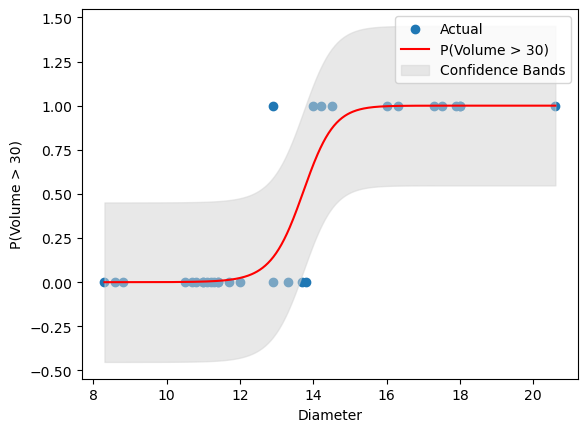

In [136]:
# Reshape the input features
X2 = X['Diameter'].values.reshape(-1, 1)

# Create polynomial features
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X2)

# Define the target variable
y_target = (y > 30).astype(int)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_poly, y_target)

# plot pre
x_values = np.linspace(min(X2), max(X2), num=500).reshape(-1, 1)
x_poly_values = poly_features.transform(x_values)
probs = model.predict_proba(x_poly_values)[:, 1]  #1列是正例的概率

mse = np.mean((y_target - model.predict_proba(X_poly)[:, 1]) ** 2)
std_error = np.sqrt(mse)

confidence_upper = probs + 2 * std_error
confidence_lower = probs - 2 * std_error

# plot
plt.scatter(X2.flatten(), y_target, label='Actual')
plt.plot(x_values.flatten(), probs, color='red', label='P(Volume > 30)')
plt.fill_between(x_values.flatten(), confidence_upper, confidence_lower, color='lightgray', alpha=0.5, label='Confidence Bands')
plt.xlabel('Diameter')
plt.ylabel('P(Volume > 30)')
plt.legend()
plt.show()


### Problem 3.3.  Fit a regression spline with deg=2 to predict the Volume 
using the variable Girth at knots 10, 14, 18. Plot the function and also the confidence bands with ±2 standard error.

<div class="alert alert-block alert-warning">
<center><b>【3.Regression Spline】</b></center>

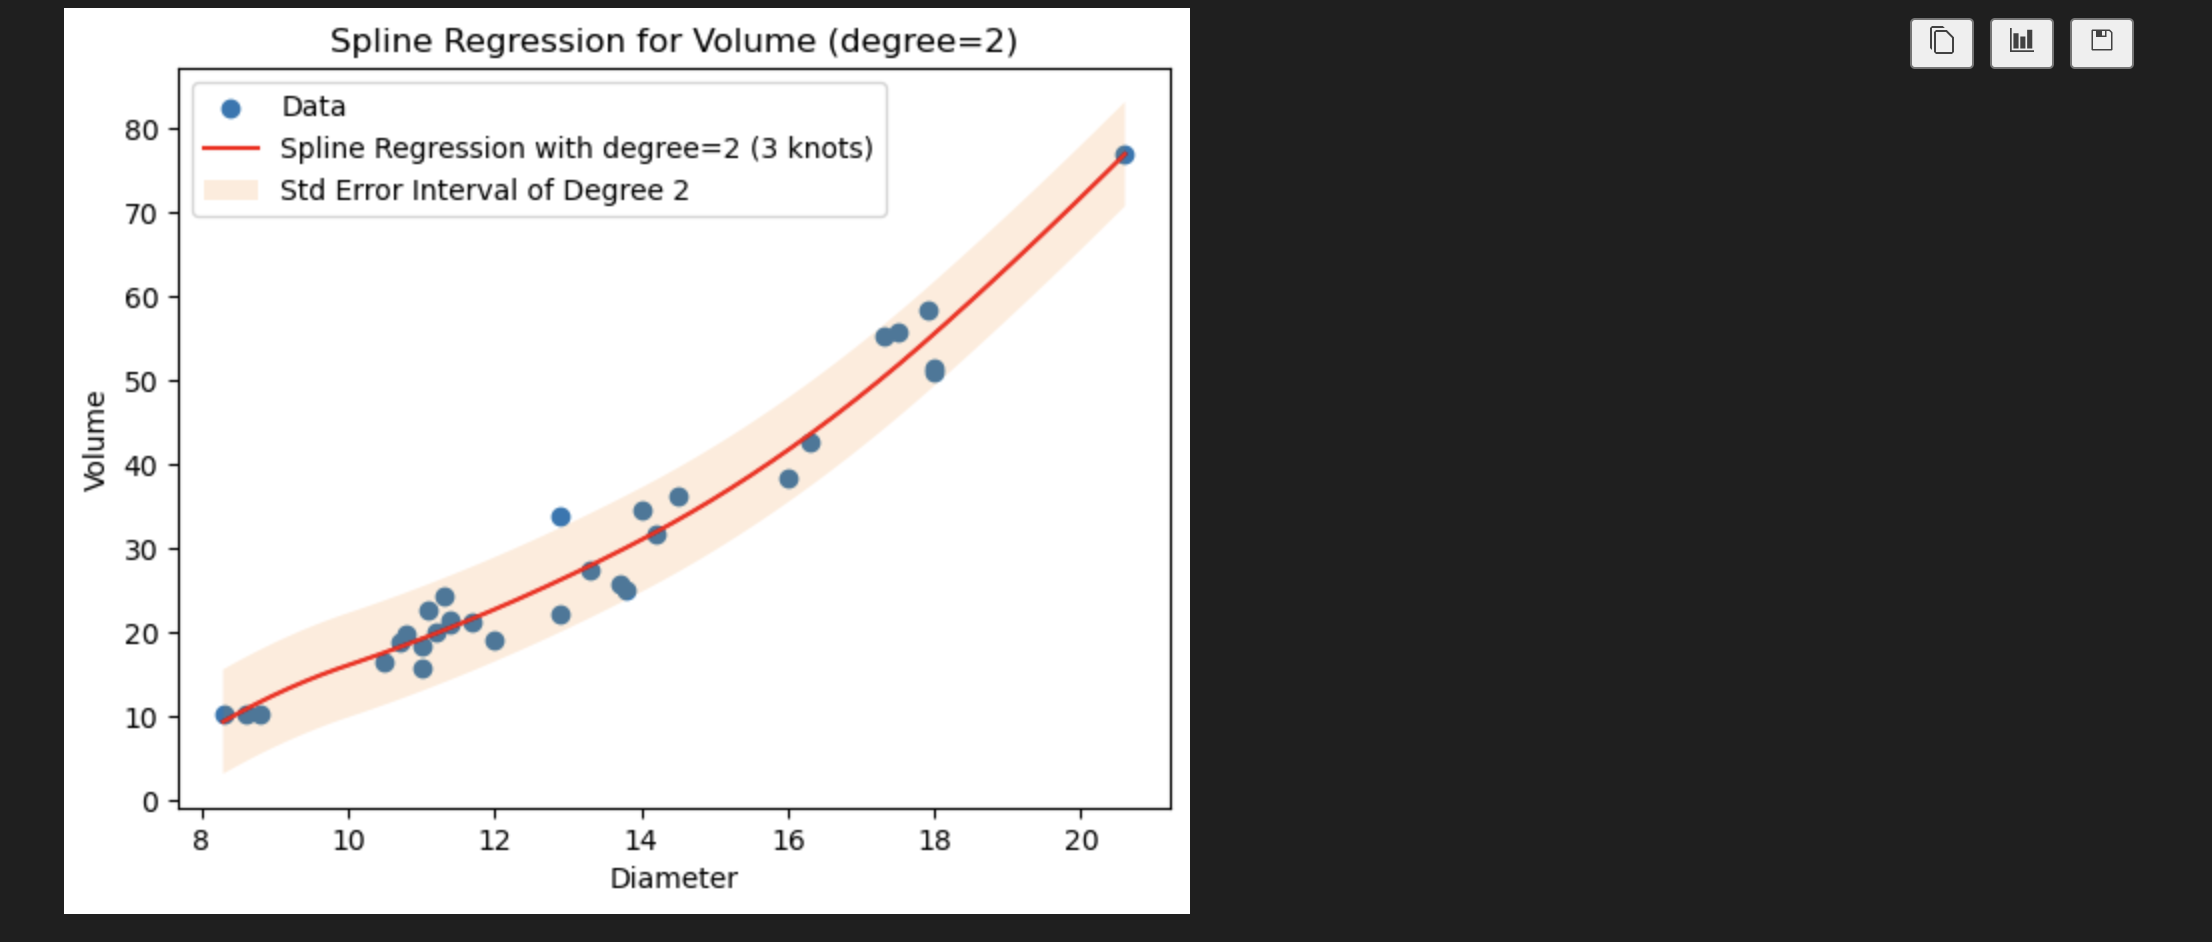


</div>

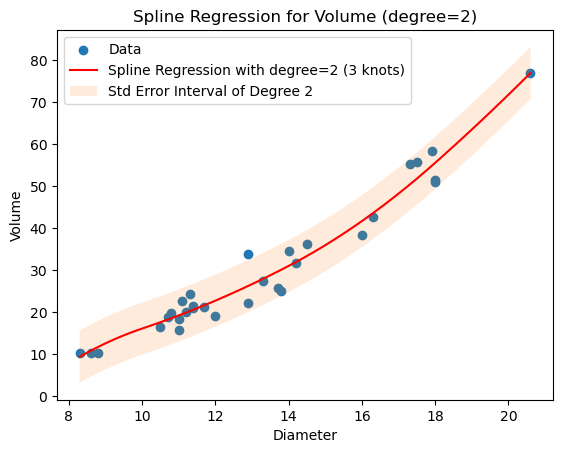

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from patsy import dmatrix

# Read the data from 'trees.csv'
x = data["Diameter"].values
y = data["Volume"].values

# Define the knots
knots = [10, 14, 18]

# Create the design matrix with B-splines
transformed_x = dmatrix(f"bs(x, knots={knots}, degree=2, include_intercept=False)", {"x": x}, return_type='dataframe')

# Fit the regression model
model = sm.GLM(y, transformed_x).fit()

# Calculate the predicted values
xp = np.linspace(x.min(), x.max(), num=500)
transformed_xp = dmatrix(f"bs(xp, knots={knots}, degree=2, include_intercept=False)", {"xp": xp}, return_type='dataframe')
pred_y = model.predict(transformed_xp)

# Calculate the confidence bands
residuals = y - model.predict(transformed_x)
std_error = np.std(residuals)
upper_bound = pred_y + 2 * std_error
lower_bound = pred_y - 2 * std_error

# Plot the function and confidence bands
plt.scatter(x, y, label='Data')
plt.plot(xp, pred_y, color='red', label='Spline Regression with degree=2 (3 knots)')
plt.fill_between(xp, lower_bound, upper_bound, alpha=0.15, label="Std Error Interval of Degree 2")
plt.legend()
plt.title("Spline Regression for Volume (degree=2)")
plt.xlabel('Diameter')
plt.ylabel('Volume')
plt.show()

### Problem 4  Smoothing spline 
Fit a smoothing spline to predict the Volume using the variable Girth where the smoothing level is chosen by Cross-Validation. Plot the function. What is the used degrees of freedom?

<div class="alert alert-block alert-warning">
<center><b>【4.Smoothing Spline】</b></center>

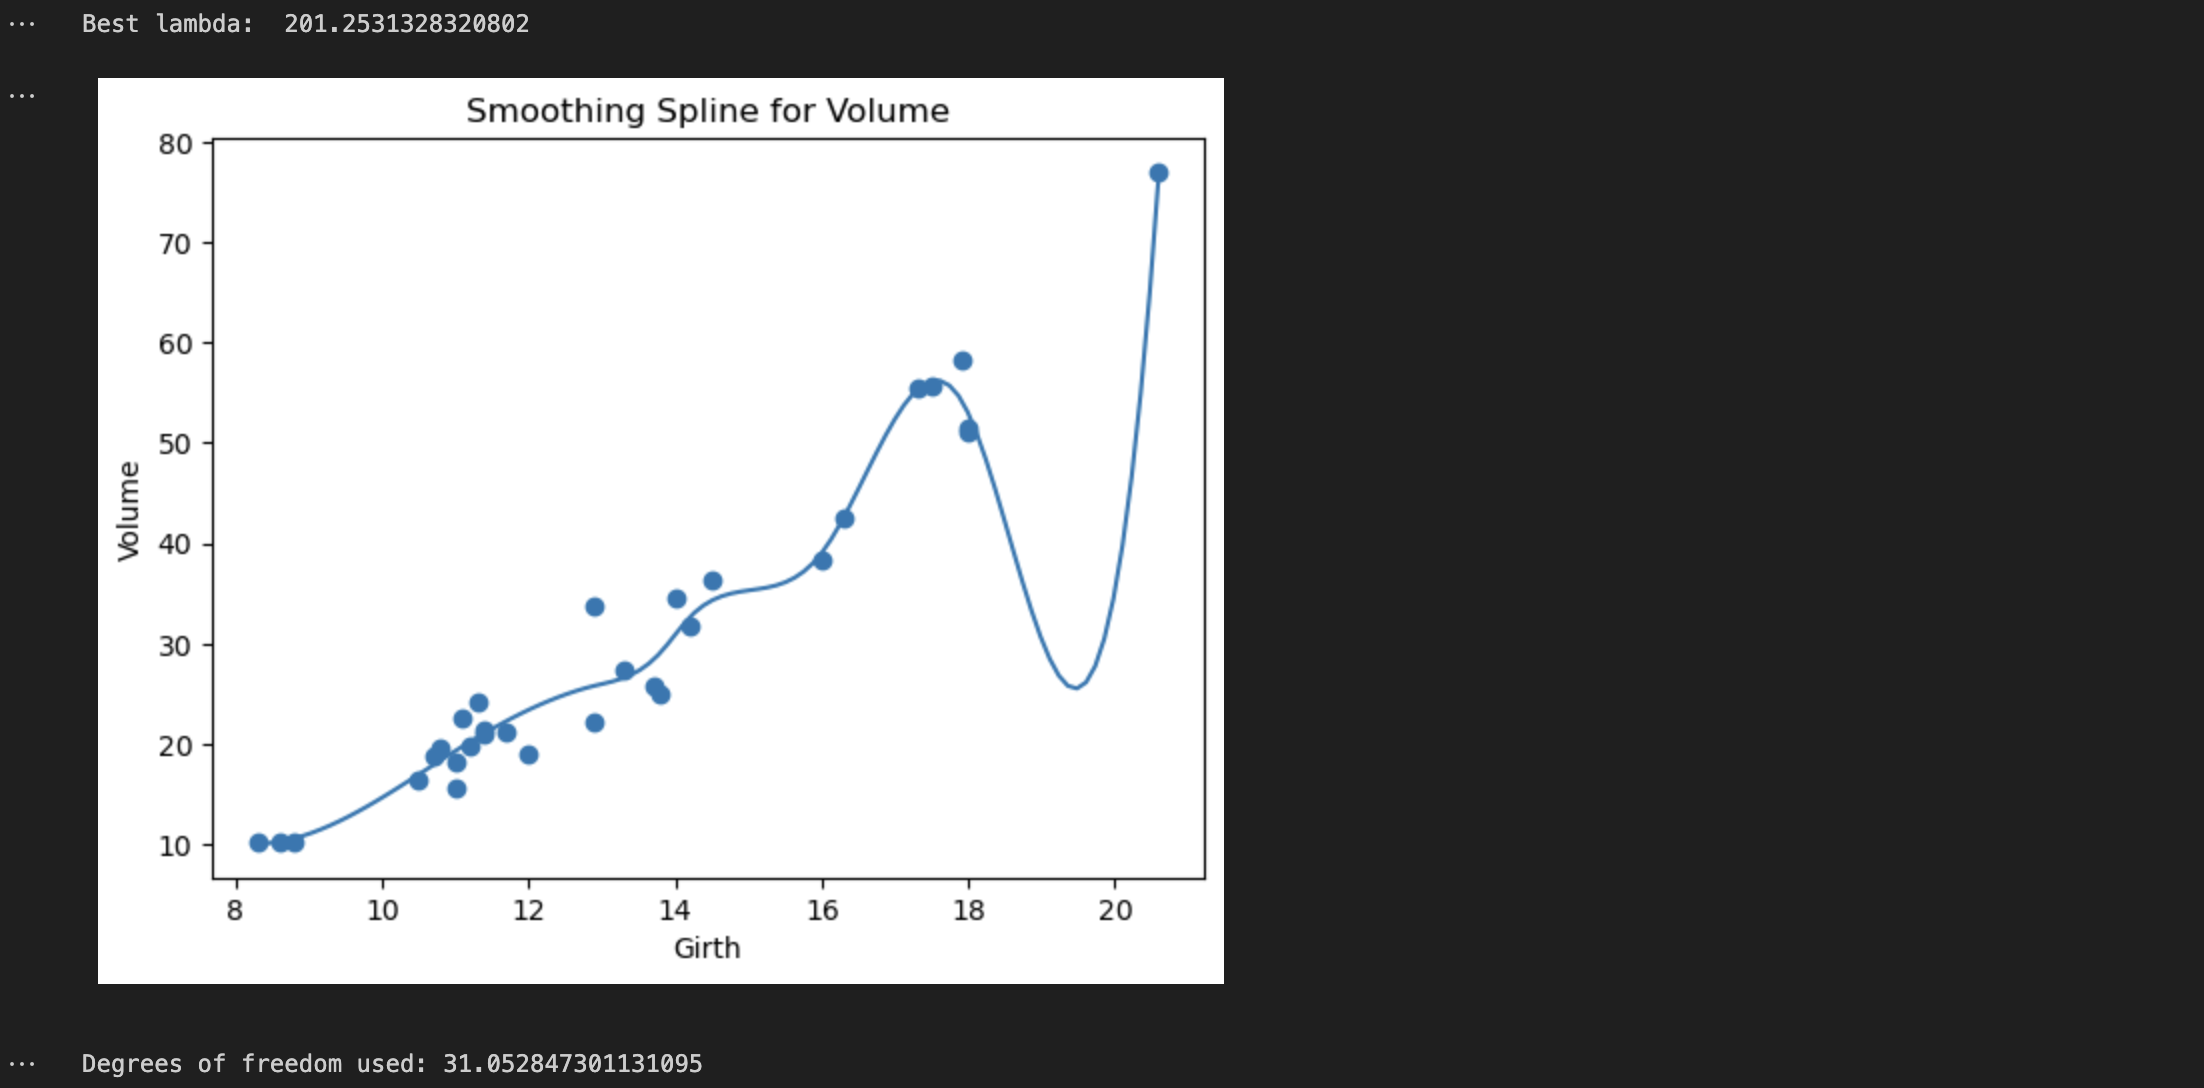


</div>

Best lambda:  201.2531328320802


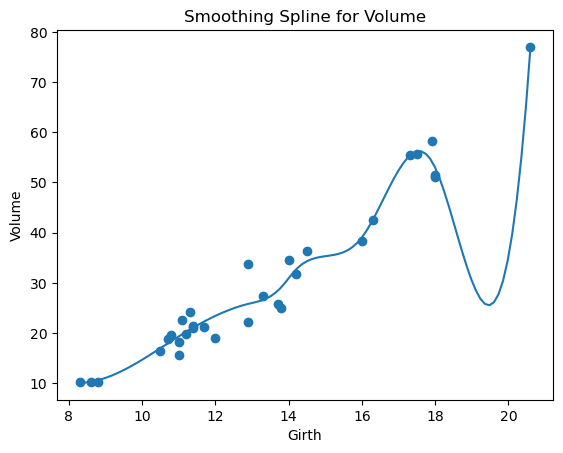

Degrees of freedom used: 31.052847301131095


In [138]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from sklearn.model_selection import KFold
import pandas as pd

# read data

x = data["Diameter"].values
y = data["Volume"].values

kf = KFold(n_splits=2)
errors = []
lambda_values = np.linspace(100, 300.0, 400)

for lambda_val in lambda_values:
    fold_errors = []
    for train_index, val_index in kf.split(x):
        x_train, x_val = x[train_index], x[val_index]
        y_train, y_val = y[train_index], y[val_index]
        
        spline = UnivariateSpline(x_train, y_train, s=lambda_val)

        y_pred = spline(x_val)
        fold_error = np.mean((y_pred - y_val)**2)
        fold_errors.append(fold_error)
    
    avg_error = np.mean(fold_errors)
    errors.append(avg_error)

best_lambda = lambda_values[np.argmin(errors)]
print("Best lambda: ", best_lambda)

spline1 = UnivariateSpline(x, y, s=best_lambda)
xp = np.linspace(x.min(), x.max(), 100)
y_pre = spline1(xp)

plt.scatter(x, y)
plt.plot(xp, y_pre)
plt.title("Smoothing Spline for Volume")
plt.xlabel('Girth')
plt.ylabel('Volume')
plt.show()

residuals = y - spline1(x)
ss_res = np.sum(residuals**2)
df = len(x) - (ss_res - best_lambda)
print("Degrees of freedom used:", df)

### Problem 5. Use Girth(Diameter) & Height to predict the Volume
Use both the variable Diameter and Height to predict the Volume by a GAM where the individual function on Diameter is a smoothing spline with df=4 and the function on Height is a smoothing spline with df=5. Plot the functions and also the confidence bands


<div class="alert alert-block alert-warning">
<center><b>【5.GAM】</b></center>

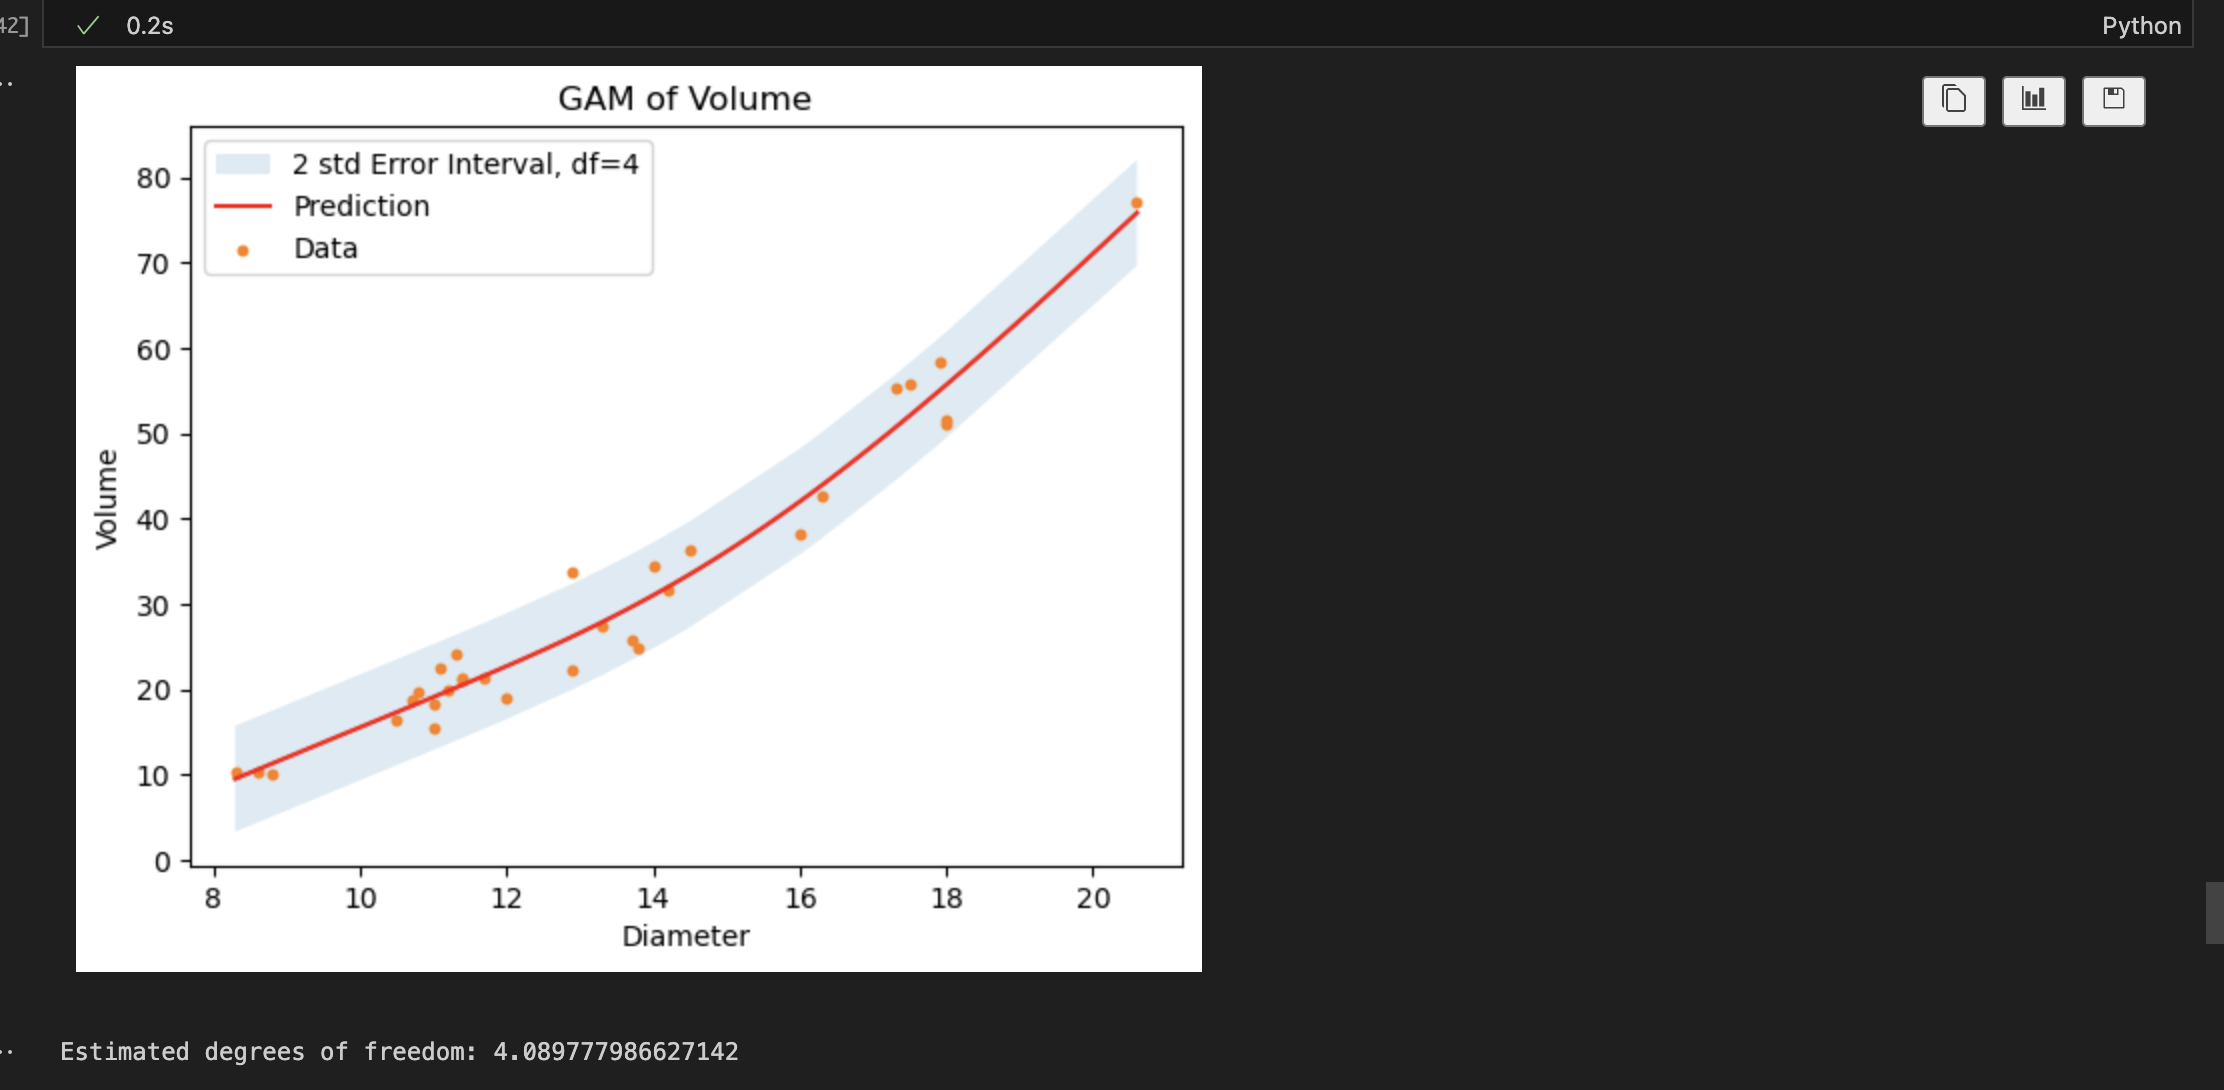

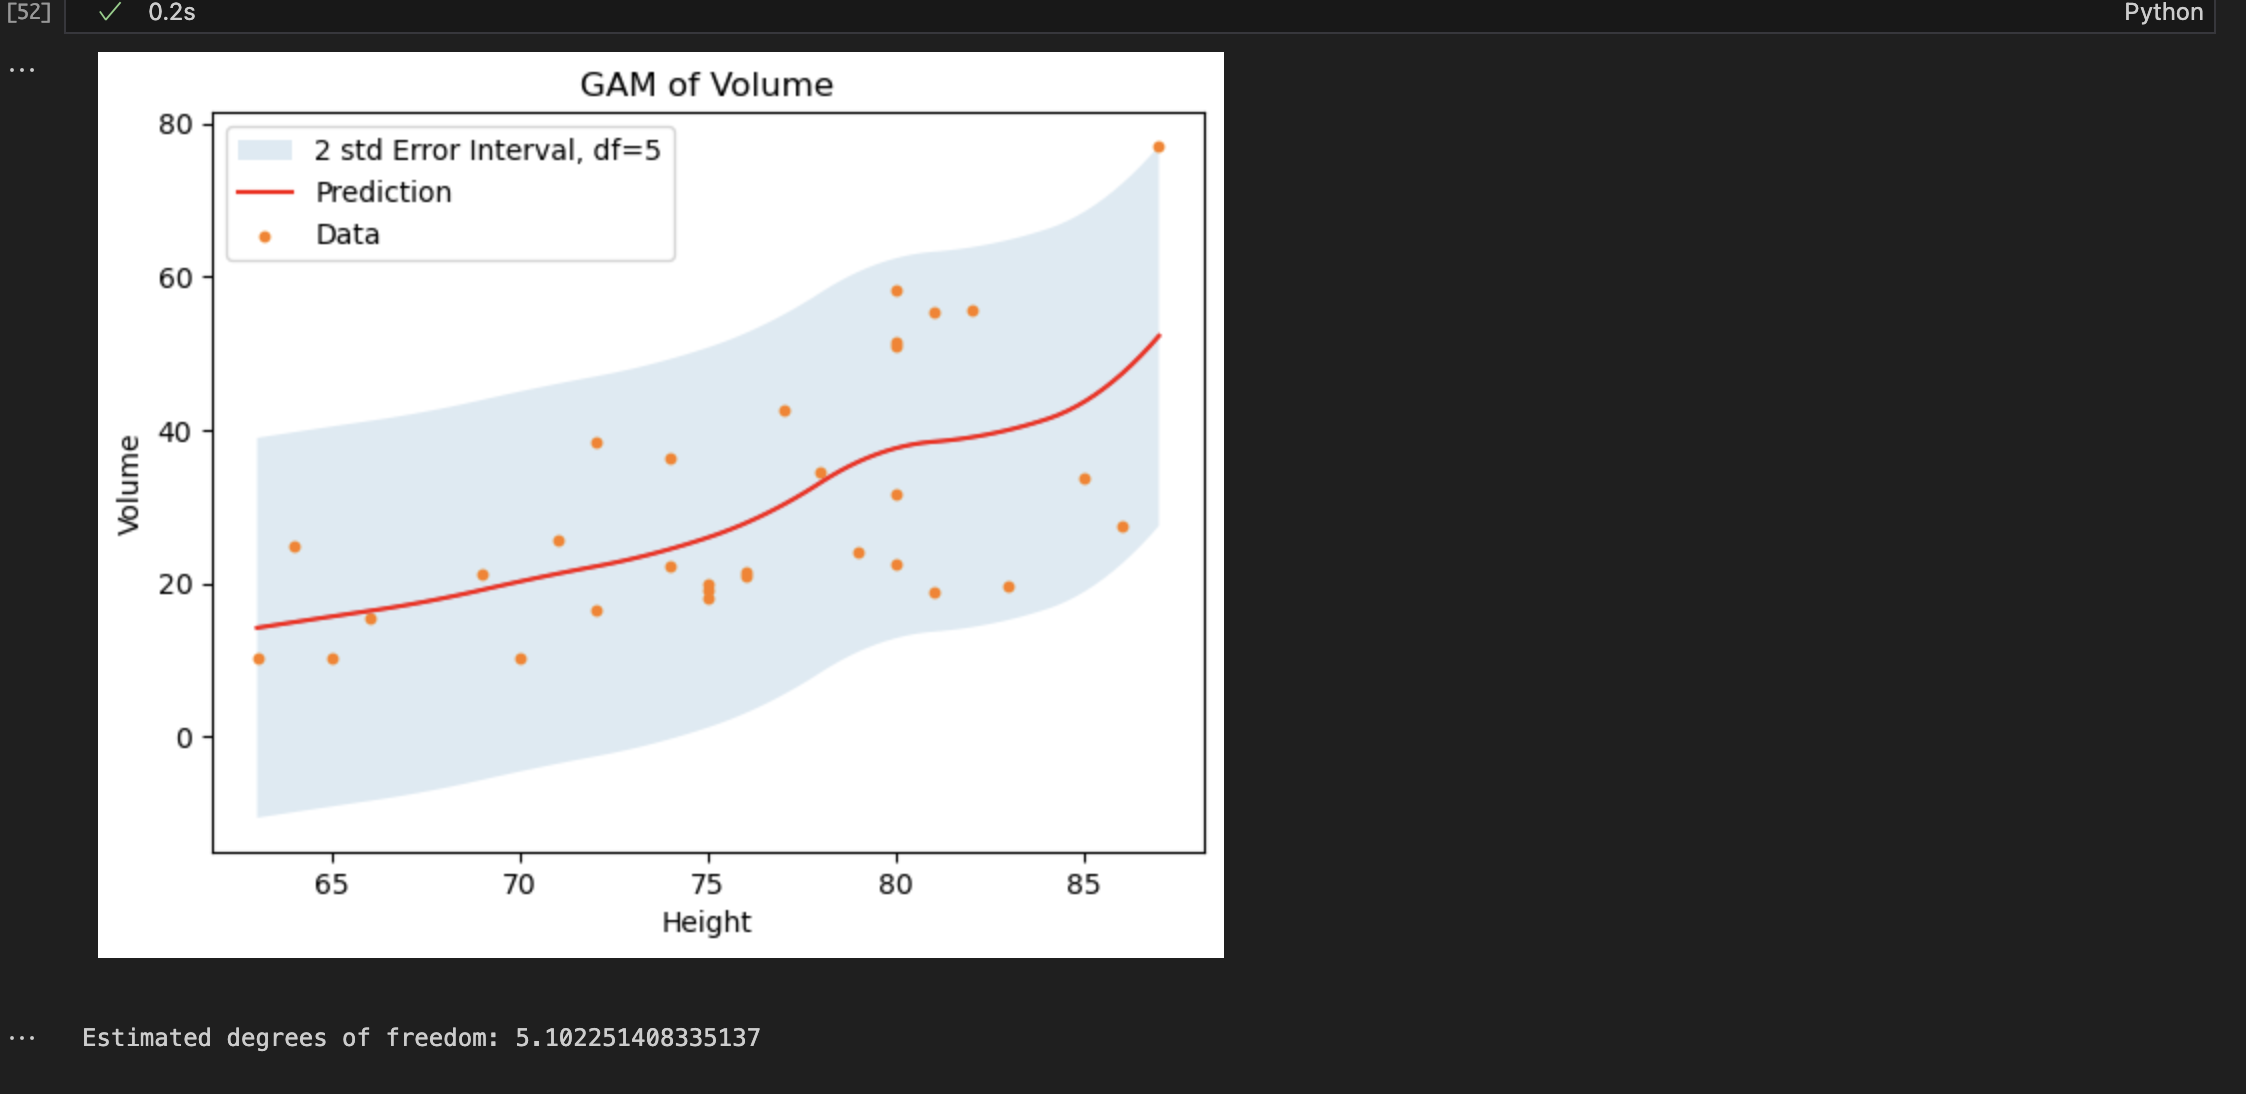

</div>

In [139]:
# Assuming we have a pandas DataFrame `data` with columns "Diameter", "Height", and "Volume"
X = data[["Diameter", "Height"]].values
y = data["Volume"].values
y.shape

(31,)

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from pygam import LinearGAM, s

# Assuming we have a pandas DataFrame `data` with columns "Diameter", "Height", and "Volume"
x_diameter = data['Diameter'].values
x_height = data['Height'].values
y = data["Volume"].values

import numpy as np
import matplotlib.pyplot as plt
from pygam import LinearGAM, s

# Assuming we have numpy arrays `x_diameter`, `x_height`, and `y`
X = np.vstack((x_diameter, x_height)).T

# Create a GAM with specified number of splines for each function
gam = LinearGAM(s(0, n_splines=4) + s(1, n_splines=5)).fit(X, y)


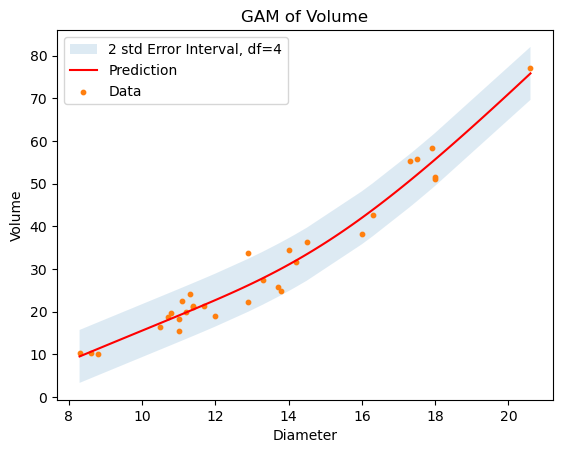

Estimated degrees of freedom: 4.089777986627142


In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pygam import LinearGAM, s

x_diameter = data['Diameter'].values
y = data['Volume'].values

# Create and fit the model
gam_model1 = LinearGAM(s(0, n_splines=10, spline_order=4)).fit(x_diameter, y)

# Create new data for plotting
newdata1 = np.linspace(data['Diameter'].min(), data['Diameter'].max(), 100)

# Predict with the model
predict1 = gam_model1.predict(newdata1)

# Compute residuals and standard error
y_pre = gam_model1.predict(x_diameter)
residuals = y - y_pre
std_error = np.std(residuals)

# Compute prediction intervals
upper_bound = y_pre + 2 * std_error
lower_bound = y_pre - 2 * std_error

# Plot the results
plt.fill_between(x_diameter, lower_bound, upper_bound, alpha=0.15, label="2 std Error Interval, df="+str(4))
plt.plot(newdata1, predict1, color='r', label="Prediction")
plt.scatter(x_diameter, y, s=10, label="Data")
plt.xlabel('Diameter')
plt.ylabel('Volume')
plt.title('GAM of Volume')
plt.legend()
plt.show()

print("Estimated degrees of freedom:", gam_model1.statistics_['edof'])

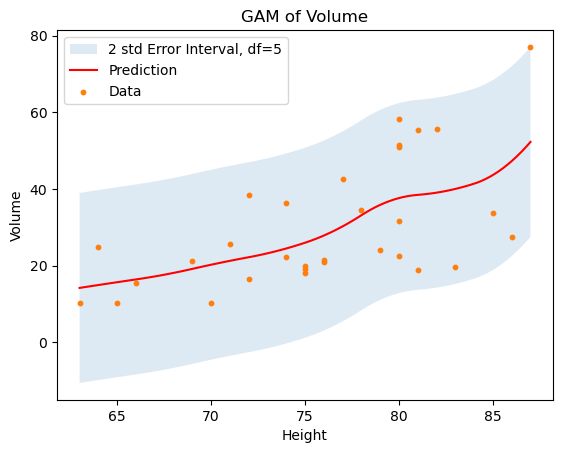

Estimated degrees of freedom: 5.102251408335137


In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pygam import LinearGAM, s

x_height = data['Height'].values
y = data['Volume'].values

# Create and fit the model
gam_model2 = LinearGAM(s(0, n_splines=10, spline_order=2)).fit(x_height, y)

# Create new data for plotting
newdata2 = np.linspace(x_height.min(), x_height.max(), 100)

# Predict with the model
predict2 = gam_model2.predict(newdata2)
pre2 =   gam_model2.predict(x_height)                        
residuals = y - pre2
std_error = np.std(residuals)

# Compute prediction intervals
upper_bound = predict2 + 2 * std_error
lower_bound = predict2 - 2 * std_error

# Plot the results
plt.fill_between(newdata2, lower_bound, upper_bound, alpha=0.15, label="2 std Error Interval, df="+str(5))
plt.plot(newdata2, predict2, color='r', label="Prediction")
plt.scatter(x_height, y, s=10, label="Data")
plt.xlabel('Height')
plt.ylabel('Volume')
plt.title('GAM of Volume')
plt.legend()
plt.show()

print("Estimated degrees of freedom:", gam_model2.statistics_['edof'])

# 3. Audit Risk

In [114]:
import pandas as pd 
import numpy as np 
audit_train = pd.read_csv('/Users/Cecilia/Documents/HKUST Data Driven Modeling/机器学习5054/HW2/Assignment 2/audit_train.csv')
audit_test = pd.read_csv('/Users/Cecilia/Documents/HKUST Data Driven Modeling/机器学习5054/HW2/Assignment 2/audit_test.csv')

In [115]:
audit_train.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,CONTROL_RISK,Detection_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,2,0.2,0.4,0,0.2,0.0,2.4,0.4,0.5,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,2,0.2,0.4,0,0.2,0.0,2.0,0.4,0.5,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,2,0.2,0.4,0,0.2,0.0,2.0,0.4,0.5,1
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,2,0.2,0.4,0,0.2,0.0,4.4,0.4,0.5,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,2,0.2,0.4,0,0.2,0.0,2.0,0.4,0.5,0


In [116]:
print(audit_test.isnull().sum())
print(audit_train.isnull().sum())


Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
CONTROL_RISK      0
Detection_Risk    0
Risk              0
dtype: int64
Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
CONTROL_RISK      0
Detection_Risk    0
Risk   

In [117]:
print(audit_train.describe())
print(audit_test.describe())

       Sector_score      PARA_A     Score_A      Risk_A       PARA_B  \
count    576.000000  576.000000  576.000000  576.000000   576.000000   
mean      20.928941    2.349411    0.349653    1.293334    11.509717   
std       24.608937    4.806264    0.174256    2.919856    56.747116   
min        1.850000    0.000000    0.200000    0.000000     0.000000   
25%        2.370000    0.187500    0.200000    0.037500     0.000000   
50%        3.890000    0.840000    0.200000    0.168000     0.370000   
75%       55.570000    2.502500    0.600000    1.501500     3.432500   
max       59.850000   71.480000    0.600000   42.888000  1264.630000   

          Score_B      Risk_B        TOTAL     numbers   Score_B.1  ...  \
count  576.000000  576.000000   576.000000  576.000000  576.000000  ...   
mean     0.310417    6.757478    13.852270    5.059028    0.222222  ...   
std      0.168148   34.070327    57.677979    0.214651    0.077746  ...   
min      0.200000    0.000000     0.000000    5.000

In [118]:
print(audit_train.dtypes)
print(audit_test.dtypes)

Sector_score      float64
LOCATION_ID        object
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
CONTROL_RISK      float64
Detection_Risk    float64
Risk                int64
dtype: object
Sector_score      float64
LOCATION_ID        object
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float6

In [119]:
# Remove non-numerical columns
train_data = audit_train.select_dtypes(exclude=['object'])
test_data = audit_test.select_dtypes(exclude=['object'])
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)
# Separate target from predictors
y_train = train_data['Risk']
y_test = test_data['Risk']

x_train = train_data.drop(['Risk'], axis=1)
x_test = test_data.drop(['Risk'], axis=1)

###  1. Classification tree 
Use the train dataset to fit a classification tree and, plot the tree and report the training error. Test the
performance on the test dataset and report the confusion matrix.

<div class="alert alert-block alert-warning">
<center><b>【3.1 Classification tree】</b></center>

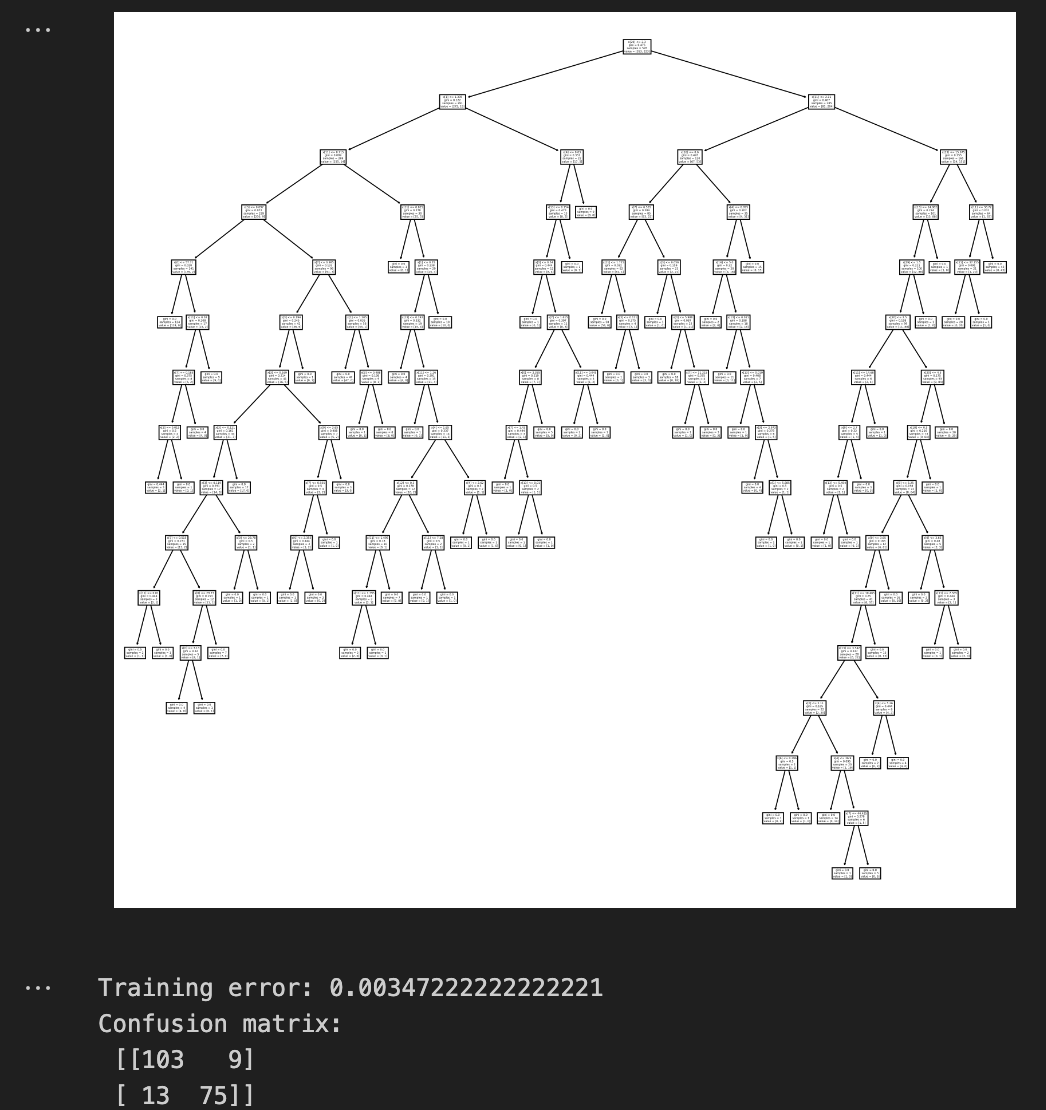

</div>

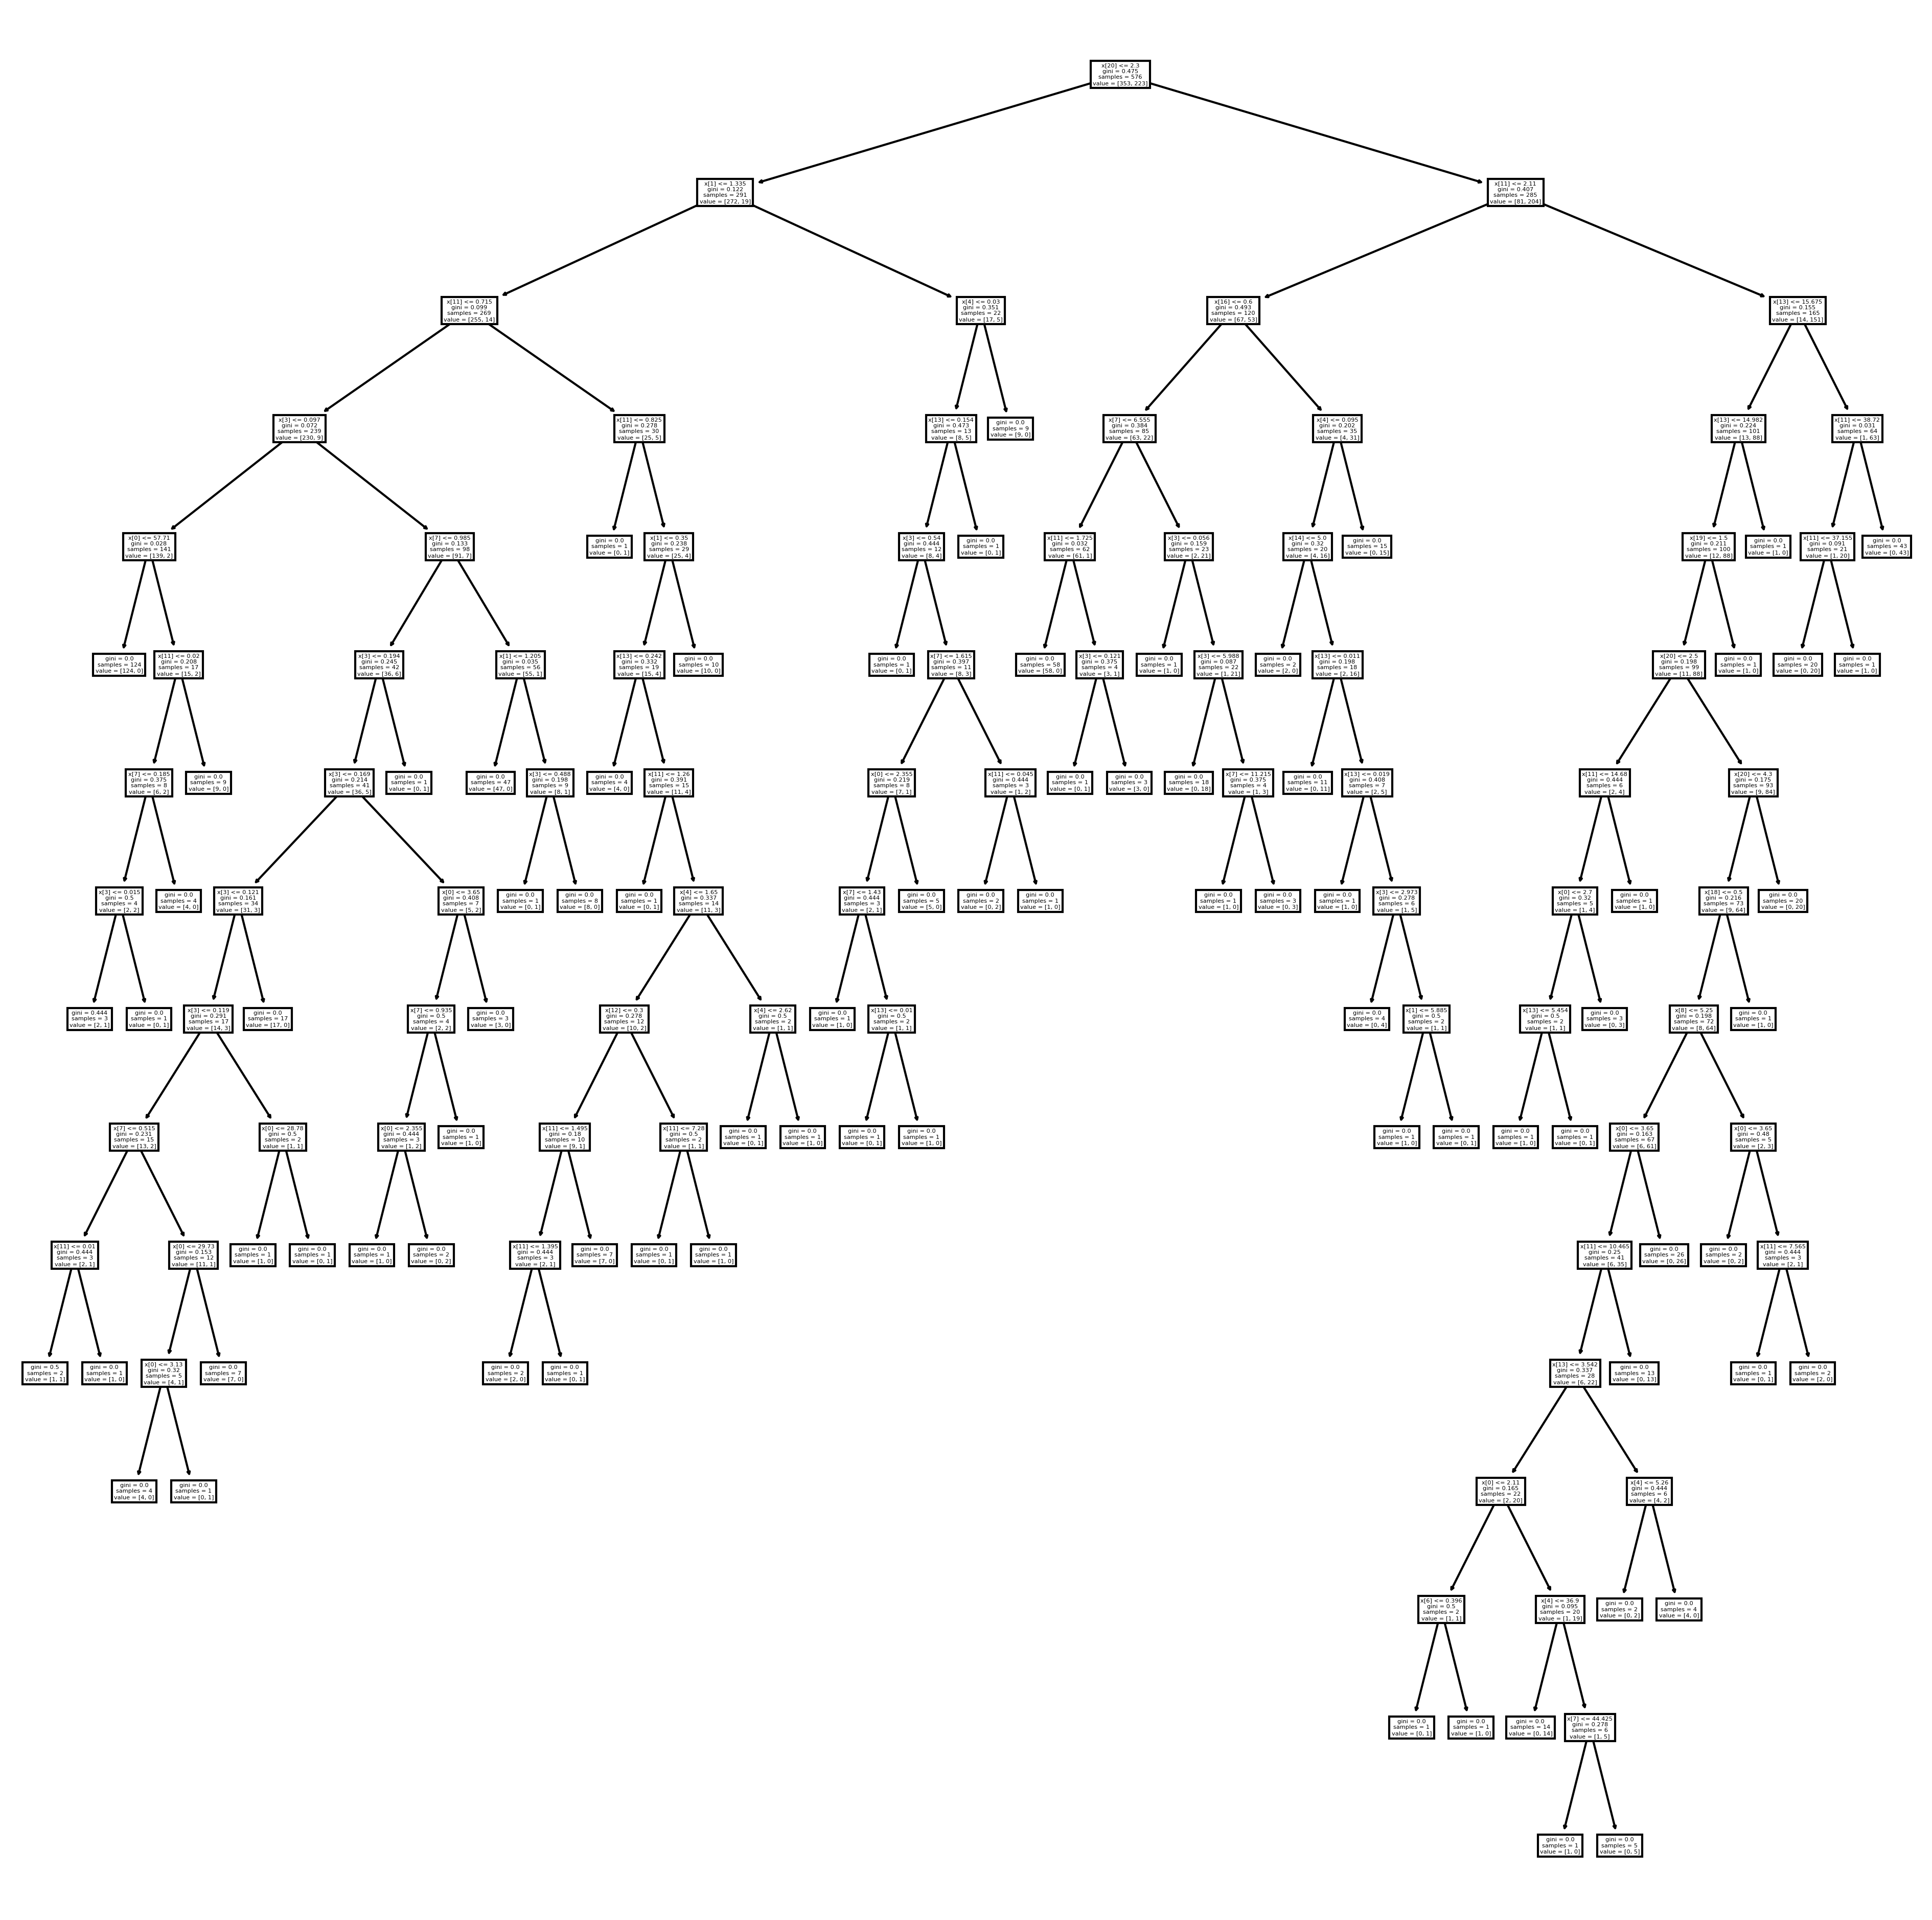

Training error: 0.00347222222222221
Confusion matrix:
 [[102   9]
 [ 13  75]]


In [120]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt


# Fit a decision tree classifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)

# Plot the tree
fig, ax = plt.subplots(figsize=(16, 16), dpi=300) 
tree.plot_tree(clf, ax=ax)
plt.show()

# Compute the training error
y_train_pred = clf.predict(x_train)
print('Training error:', 1 - accuracy_score(y_train, y_train_pred))

# Test the classifier on the test data
y_test_pred = clf.predict(x_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion matrix:\n', cm)

###  2. Use CV to prune the tree in Step 1 on the train dataset. 
Plot the train error versus the tree size. Plot the pruned tree which has the best train error. Report the test error

<div class="alert alert-block alert-warning">
<center><b>【3.2 Prune the Tree】</b></center>

- the size = 4

- Test error of pruned tree: 0.0653


</div>

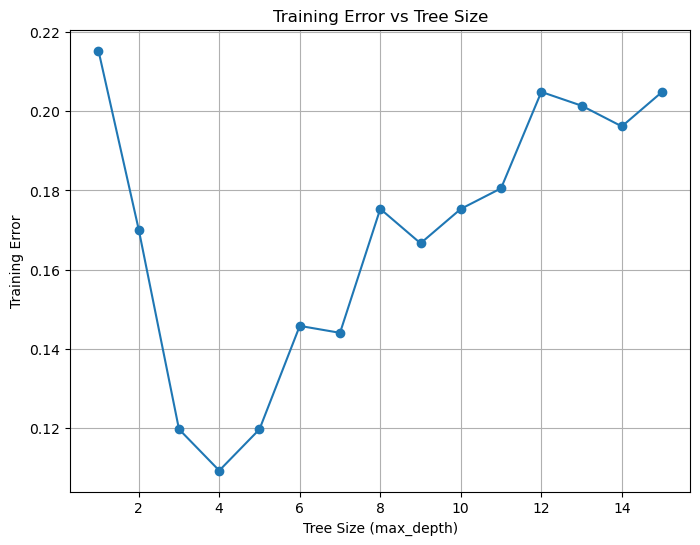

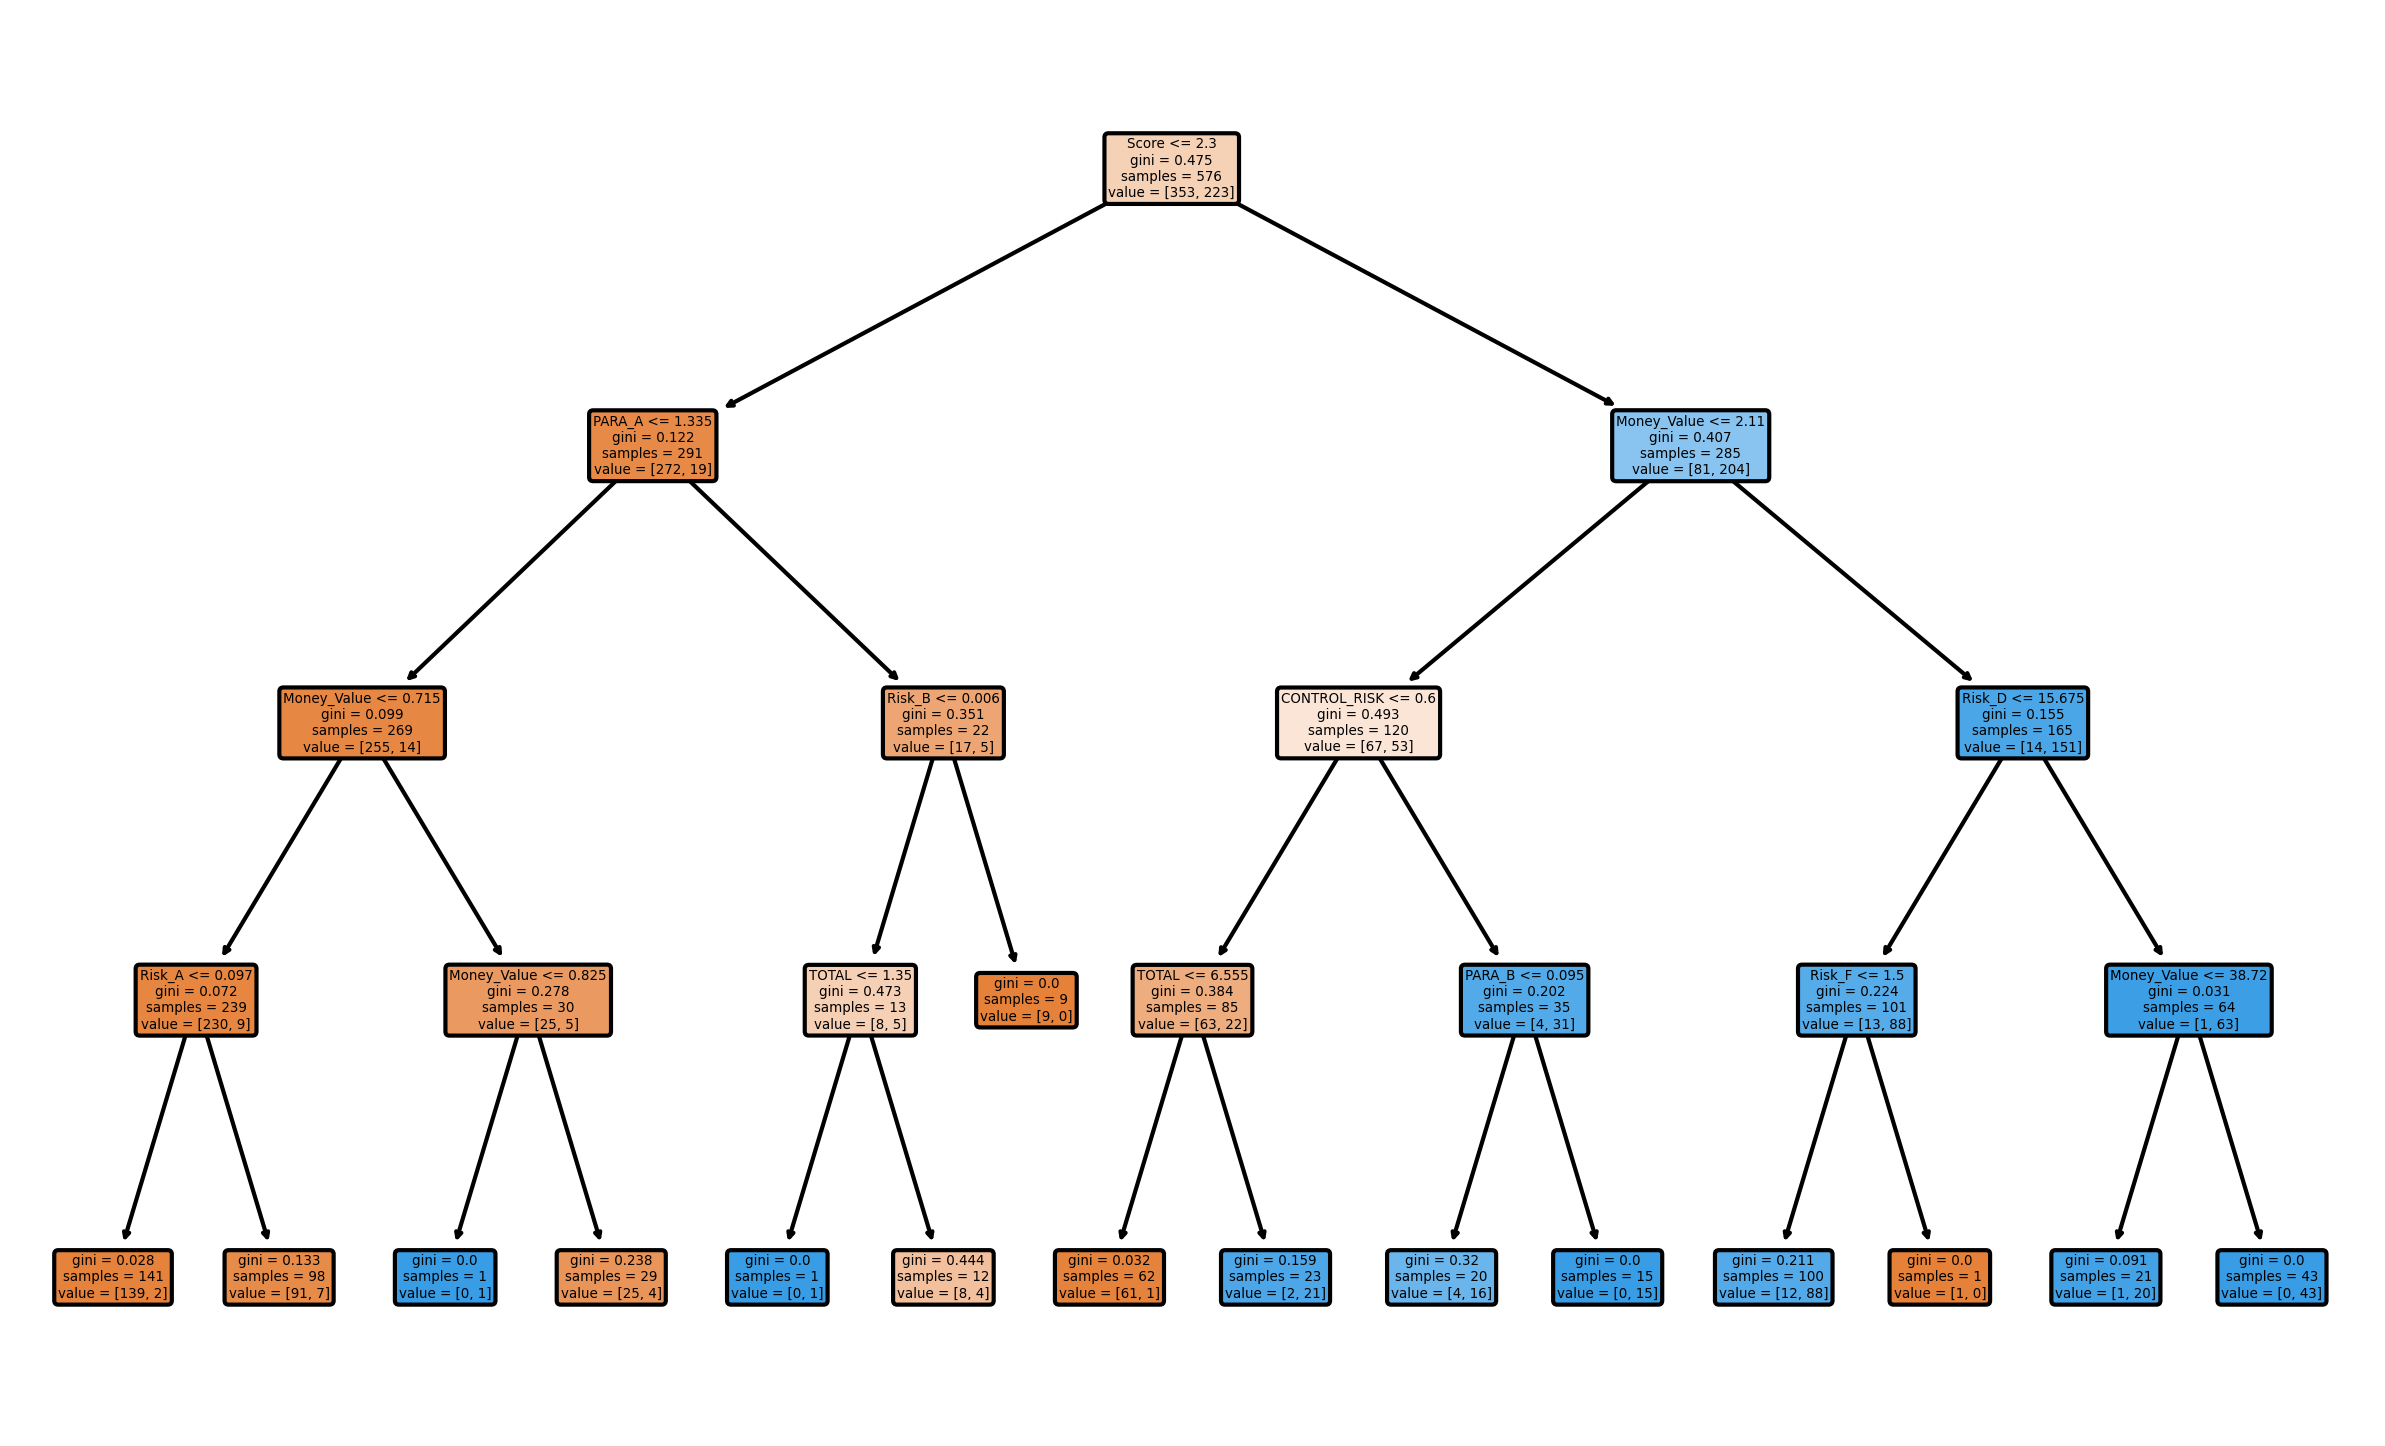

Test error of pruned tree: 0.0653266331658291


In [121]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Fit a decision tree classifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)

# Define the parameter range for max_depth
params = {'max_depth': range(1, clf.tree_.max_depth+1, 1)}

# Perform grid search
grid_search = GridSearchCV(estimator=clf, param_grid=params, cv=5)
grid_search.fit(x_train, y_train)

# Find best max_depth
best_max_depth = grid_search.best_params_['max_depth']

# Train decision tree with best max_depth
clf_pruned = DecisionTreeClassifier(max_depth=best_max_depth, random_state=0)
clf_pruned.fit(x_train, y_train)

# Plot the train error versus the tree size
train_errors = 1 - grid_search.cv_results_['mean_test_score']
plt.figure(figsize=(8, 6))
plt.plot(params['max_depth'], train_errors, marker='o')
plt.title('Training Error vs Tree Size')
plt.xlabel('Tree Size (max_depth)')
plt.ylabel('Training Error')
plt.grid(True)
plt.show()

# Plot the pruned tree
fig, ax = plt.subplots(figsize=(10, 6),dpi=300) 
plot_tree(clf_pruned, ax=ax, filled=True, rounded=True, feature_names=x_train.columns.tolist())
plt.show()



# Compute the test error
y_test_pred = clf_pruned.predict(x_test)
test_error = 1 - accuracy_score(y_test, y_test_pred)
print(f'Test error of pruned tree: {test_error}')

### 3. Random forest 
Use random forest on the train dataset to build a classifier to predict the risk where setting m=13 and ntree=25. Report the training error.

<div class="alert alert-block alert-warning">
<center><b>【3.3 Random forest】</b></center>

Training error: 0.00694


</div>

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=25, max_features=13, random_state=0)

# Fit the model on the training data
rf.fit(x_train, y_train)

# Predict the training data
y_train_pred = rf.predict(x_train)

# Calculate the training error
train_error = 1 - accuracy_score(y_train, y_train_pred)

print(f'Training error: {train_error}')

Training error: 0.00694444444444442


### 4. Repeat Step 3 with four difference choices m = 8, 12, 14, 16, 18 
and choose the one with smallest misclassification error on the train dataset. Test its performance on the test dataset.

<div class="alert alert-block alert-warning">
<center><b>【3.4】</b></center>

Training error with m=8: 0.0069

Training error with m=12: 0.0052

Training error with m=14: 0.0052

Training error with m=16: 0.0052

Training error with m=18: 0.0052

Test error of best model:0.0452


</div>

In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the values for m
m_values = [8, 12, 14, 16, 18]

# Initialize variables to store the best model and its error
best_model = None
best_error = float('inf')

# Loop over all m values
for m in m_values:
    # Initialize the RandomForestClassifier
    rf = RandomForestClassifier(n_estimators=25, max_features=m, random_state=0)

    # Fit the model on the training data
    rf.fit(x_train, y_train)

    # Predict the training data
    y_train_pred = rf.predict(x_train)

    # Calculate the training error
    train_error = 1 - accuracy_score(y_train, y_train_pred)

    print(f'Training error with m={m}: {train_error}')

    # If this model is better than the previous ones, store it
    if train_error < best_error:
        best_error = train_error
        best_model = rf

# Test the best model on the test dataset
y_test_pred = best_model.predict(x_test)

# Calculate the test error
test_error = 1 - accuracy_score(y_test, y_test_pred)

print('Test error of best model:{:.4f}'.format(test_error))

Training error with m=8: 0.00694444444444442
Training error with m=12: 0.00520833333333337
Training error with m=14: 0.00520833333333337
Training error with m=16: 0.00520833333333337
Training error with m=18: 0.00520833333333337
Test error of best model:0.0452


### 5. Compare the above methods and report any findings you observe

<div class="alert alert-block alert-warning">
<center><b>【3.4】</b></center>

1. Create a classification tree. The train error is minimal. However, the classification in this case is very complex and may cause overfitting. The model is not general enough and the complexity is also very high.

2. After branch reduction, the model complexity is reduced, but the error is relatively large.

3. Random forest performs better. By adjusting the number of features, the error of the best model can be controlled within 0.05.

4. In random forest, as the number of features increases, it can bring smaller errors, but after reaching a certain number, the error remains unchanged.

</div>

# Problem 4: Implementing Regression Tree

<div class="alert alert-block alert-warning">
<center><b>【4】</b></center>


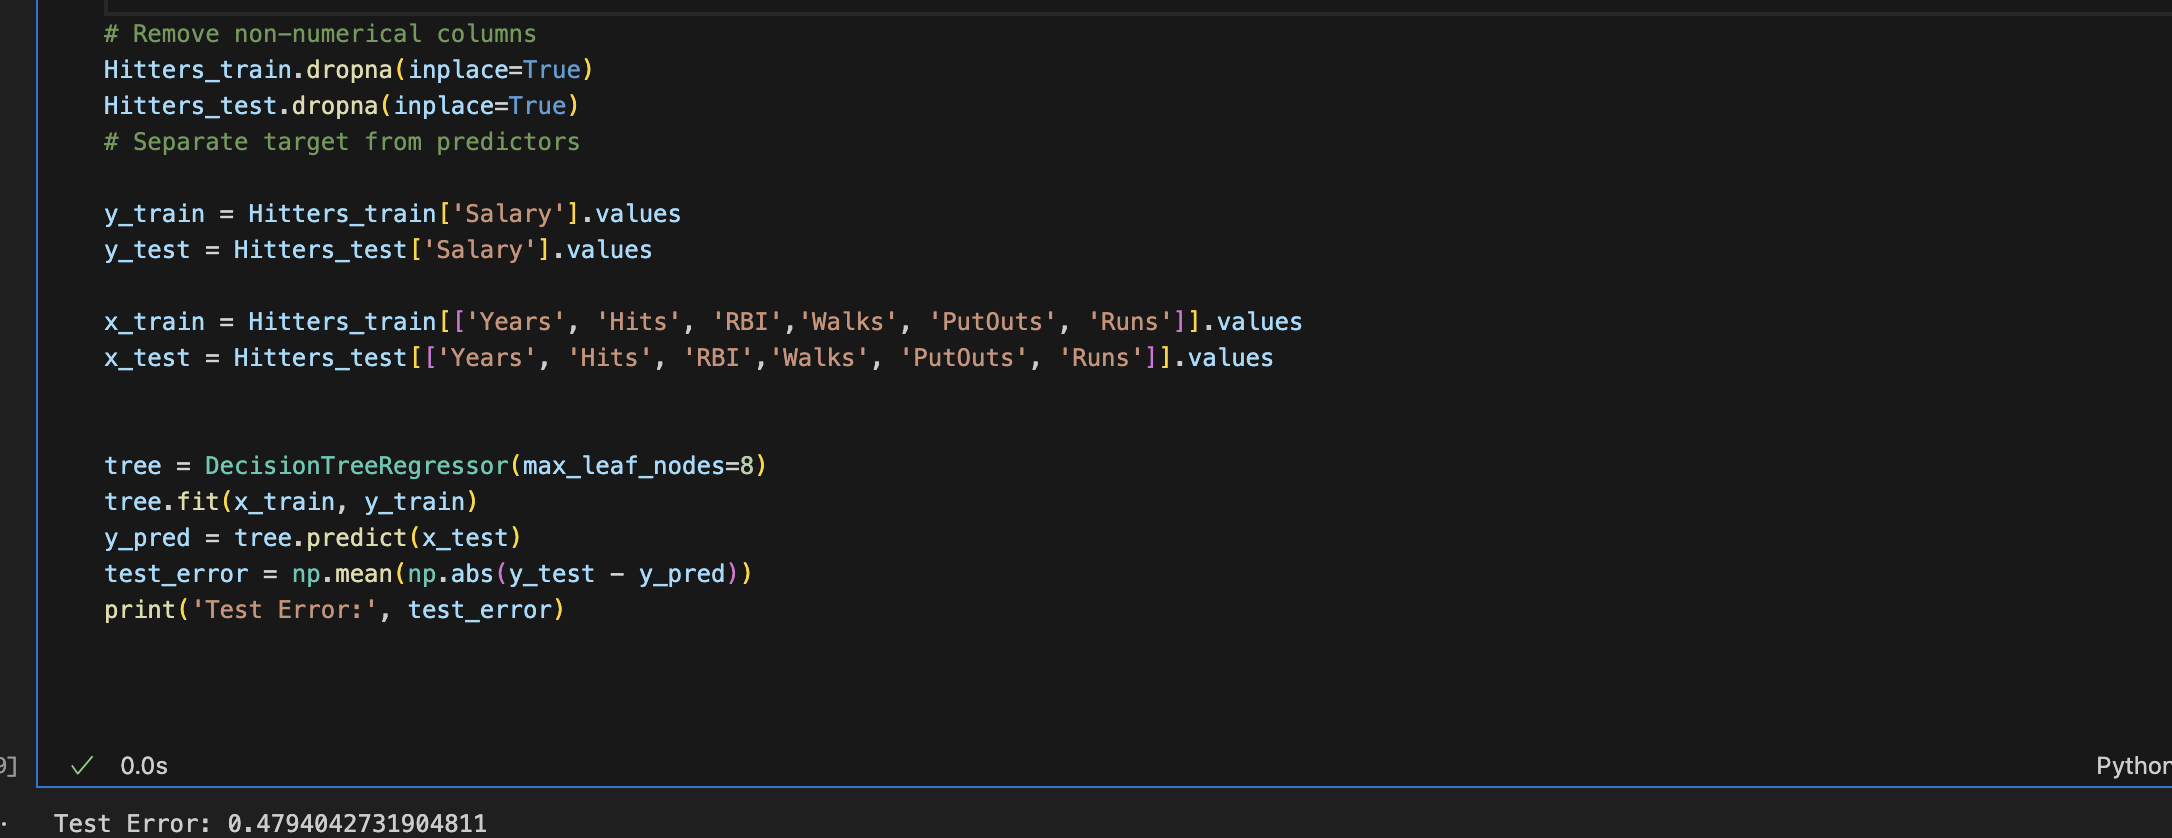

</div>

In [2]:
import numpy as np

class Node:
    def __init__(self, predicted_value):
        self.predicted_value = predicted_value
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None


class DecisionTreeRegressor:
    def __init__(self, max_leaf_nodes=10, v_gain=1e-10):
        self.max_leaf_nodes = max_leaf_nodes
        self.v_gain = v_gain


    def fit(self, X, y):
        self.n_features = X.shape[1]
        self.n_outputs = 1
        self.tree_ = self._grow_tree(X, y)

    def best_split(self, X, y):
        m = y.size
        if m <= 1:
            return None, None
        best_idx, best_thr = None, None
        min_abs_loss = np.inf
        for idx in range(self.n_features):
            thresholds = np.unique(X[:, idx])
            for threshold in thresholds:
                left = y[X[:, idx] < threshold]
                right = y[X[:, idx] >= threshold]
                abs_loss = np.sum(np.abs(left - np.mean(left))) + np.sum(np.abs(right - np.mean(right)))
                if abs_loss < min_abs_loss:
                    min_abs_loss = abs_loss
                    best_idx = idx
                    best_thr = threshold
        return best_idx, best_thr
        

    def _grow_tree(self, X, y, depth=0):
        predicted_value = np.mean(y)
        node = Node(predicted_value=predicted_value)
        if depth < self.max_leaf_nodes:
            idx, thr = self.best_split(X, y)
            if idx is not None:
                indices_left = X[:, idx] < thr
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                node.feature_index = idx
                node.threshold = thr
                node.left = self._grow_tree(X_left, y_left, depth + 1)
                node.right = self._grow_tree(X_right, y_right, depth + 1)
        return node
        
    def predict(self, X):
        return [self._predict(inputs) for inputs in X]

    def _predict(self, inputs):
        node = self.tree_
        while node.left:
            if inputs[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.predicted_value


In [3]:
import pandas as pd 
import numpy as np 
Hitters_train = pd.read_csv('/Users/Cecilia/Documents/HKUST Data Driven Modeling/机器学习5054/HW2/Assignment 2/Hitters_train.csv')
Hitters_test = pd.read_csv('/Users/Cecilia/Documents/HKUST Data Driven Modeling/机器学习5054/HW2/Assignment 2/Hitters_test.csv')

In [4]:
Hitters_train.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,181.000000
mean,374.761261,98.396396,10.378378,49.860360,46.810811,38.090090,7.342342,2567.612613,695.126126,65.878378,344.941441,317.711712,251.599099,287.076577,107.743243,8.382883,5.822305
std,152.753200,45.517095,8.424865,25.076054,26.155301,21.221329,5.036510,2407.900090,682.663331,84.993098,344.527102,336.915658,275.501544,281.544751,134.325976,6.437466,0.883470
min,16.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.212128
25%,248.000000,60.000000,4.000000,30.000000,27.250000,21.250000,4.000000,715.000000,181.250000,12.000000,88.250000,80.000000,61.000000,109.500000,7.000000,4.000000,5.105945
50%,359.500000,94.000000,8.000000,46.000000,42.500000,34.500000,6.000000,1692.500000,440.500000,34.500000,217.500000,187.000000,155.000000,204.000000,43.000000,7.000000,5.857933
75%,510.000000,135.000000,16.000000,69.000000,60.000000,52.000000,11.000000,3868.000000,990.250000,82.500000,514.750000,420.750000,319.000000,323.500000,166.000000,12.000000,6.586172
max,687.000000,213.000000,34.000000,108.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,29.000000,7.788419


In [5]:
Hitters_train.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       41
NewLeague     0
dtype: int64

In [6]:
Hitters_test.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       18
NewLeague     0
dtype: int64

In [9]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Remove non-numerical columns
Hitters_train.dropna(inplace=True)
Hitters_test.dropna(inplace=True)
# Separate target from predictors

y_train = Hitters_train['Salary'].values
y_test = Hitters_test['Salary'].values

x_train = Hitters_train[['Years', 'Hits', 'RBI','Walks', 'PutOuts', 'Runs']].values
x_test = Hitters_test[['Years', 'Hits', 'RBI','Walks', 'PutOuts', 'Runs']].values


tree = DecisionTreeRegressor(max_leaf_nodes=8)  
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)
test_error = np.mean(np.abs(y_test - y_pred))
print('Test Error:', test_error)




Test Error: 0.4794042731904811
